In [4]:
%matplotlib inline

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from HeaderP import *
plt.rcParams.keys()
plt.rc('font', family='serif')
params = {
   'axes.labelsize': 30,
   'axes.linewidth': 1.5,
   'legend.fontsize': 25,
   'legend.frameon': False,
   'lines.linewidth': 2,
   'xtick.direction': 'in',
   'xtick.labelsize': 25,
   'xtick.major.bottom': True,
   'xtick.major.pad': 10,
   'xtick.major.size': 10,
   'xtick.major.width': 1,
   'xtick.minor.bottom': True,
   'xtick.minor.pad': 3.5,
   'xtick.minor.size': 5,
   'xtick.minor.top': True,
   'xtick.minor.visible': True,
   'xtick.minor.width': 1,
   'xtick.top': True,
   'ytick.direction': 'in',
   'ytick.labelsize': 25,
   'ytick.major.pad': 10,
   'ytick.major.size': 10,
   'ytick.major.width': 1,
   'ytick.minor.pad': 3.5,
   'ytick.minor.size': 5,
   'ytick.minor.visible': True,
   'ytick.minor.width': 1,
   'ytick.right': True,
   'figure.figsize': [10,10], # instead of 4.5, 4.5
   'savefig.format': 'eps',
   }
plt.rcParams.update(params)

def fitpoints(x,y):
    z = np.polyfit(x,y,1)
    p = np.poly1d(z)
    return p


/Users/lucy/anaconda3/lib/python3.7/site-packages/sklearn/utils/__init__.py:4: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Sequence
/Users/lucy/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:18: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Iterable
/Users/lucy/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:16: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Mapping, namedtuple, defaultdict, Sequence
/Users/lucy/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module 

Ages from https://ui.adsabs.harvard.edu/abs/2019yCat..22390032P/abstract

In [5]:
from astropy.io import fits

In [6]:
hdulist = fits.open('asu.fit')


In [7]:
df1 = pd.DataFrame(hdulist[1].data, dtype="float64")
df2 = pd.DataFrame(hdulist[2].data, dtype="float64")

In [8]:
df=pd.merge(df1,df2,left_on='KIC',right_on='KIC',how='inner')

In [9]:
df.columns

Index(['_RAJ2000', '_DEJ2000', 'KIC', '_2MASS', 'Teff', 'e_Teff', 'FeH',
       'e_FeH', 'AFe', 'e_AFe', 'Numax', 'e_Numax', 'Dnu', 'e_Dnu', 'ES',
       'Fdnu', 'e_Fdnu', 'M_cor_', 'e_M_cor_', 's_M_cor_', 'R_cor_',
       'e_R_cor_', 's_R_cor_', 'logg_seis_', 'e_logg_seis_', 's_logg_seis_',
       'Rho', 'e_Rho', 's_Rho', 'LogAge', 'E_LogAge', 'e_logage_lc', 'Av',
       'e_Av', 'Notes', 'AP-1', 'KCat', 'Sloan', 'Simbad', '_RA', '_DE',
       'Nmax-A2Z', 'e_Nmax-A2Z', 'Dnu-A2Z', 'e_Dnu-A2Z', 'Nmax-CAN',
       'e_Nmax-CAN', 'Dnu-CAN', 'e_Dnu-CAN', 'Nmax-COR', 'e_Nmax-COR',
       'Dnu-COR', 'e_Dnu-COR', 'Nmax-OCT', 'e_Nmax-OCT', 'Dnu-OCT',
       'e_Dnu-OCT', 'Nmax-SYD', 'e_Nmax-SYD', 'Dnu-SYD', 'e_Dnu-SYD'],
      dtype='object')

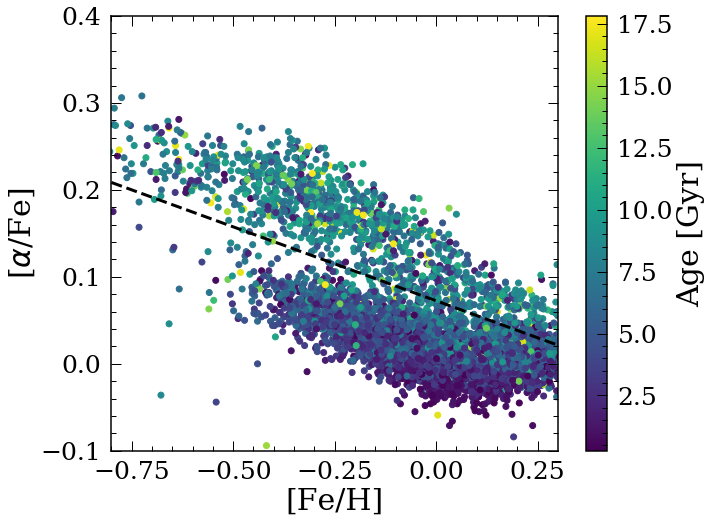

In [10]:
df['Age']=np.power(10,df['LogAge'])/1e3
df['Age_err']=np.power(10,df['E_LogAge'])/1e3

p=fitpoints([-0.75,0.25],[0.2,0.03])

plt.figure(figsize=(10,8))
cm = plt.cm.get_cmap('viridis',5)
plt.scatter(df['FeH'],df['AFe'],c=df['Age'])
plt.plot([-0.8,0.3],p([-0.8,0.3]),'k--',linewidth=3)
plt.xlim([-0.8,0.3])
plt.ylim([-0.1,0.4])
plt.xlabel('[Fe/H]')
plt.ylabel('[$\\alpha$/Fe]')
cb=plt.colorbar()
cb.set_label('Age [Gyr]')

Text(0, 0.5, '[$\\alpha$/Fe]')

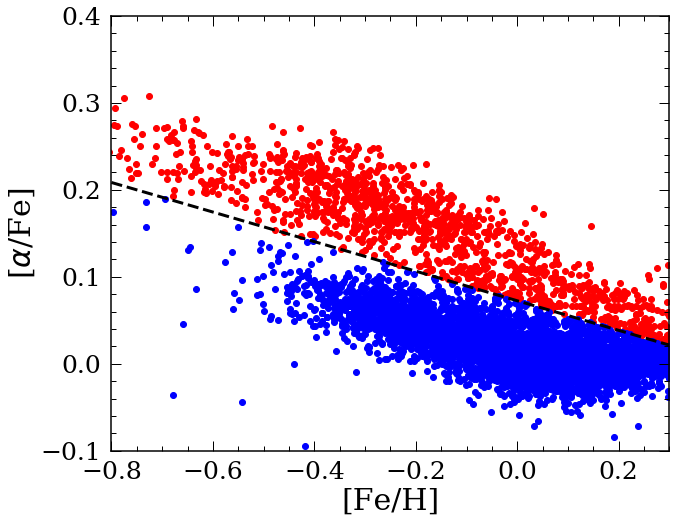

In [11]:
high_alpha=df[df['AFe']-p(df['FeH'])>=0]
low_alpha=df[df['AFe']-p(df['FeH'])<0]

p=fitpoints([-0.75,0.25],[0.2,0.03])

plt.figure(figsize=(10,8))
plt.scatter(high_alpha['FeH'],high_alpha['AFe'],c='r')
plt.scatter(low_alpha['FeH'],low_alpha['AFe'],c='b')
plt.plot([-0.8,0.3],p([-0.8,0.3]),'k--',linewidth=3)
plt.xlim([-0.8,0.3])
plt.ylim([-0.1,0.4])
plt.xlabel('[Fe/H]')
plt.ylabel('[$\\alpha$/Fe]')


_RAJ2000
_DEJ2000
KIC
_2MASS
Teff
e_Teff
FeH
e_FeH
AFe
e_AFe
Numax
e_Numax
Dnu
e_Dnu
ES
Fdnu
e_Fdnu
M_cor_
e_M_cor_
s_M_cor_
R_cor_
e_R_cor_
s_R_cor_


/Users/lucy/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  if __name__ == '__main__':


logg_seis_
e_logg_seis_
s_logg_seis_
Rho
e_Rho
s_Rho
LogAge
E_LogAge
e_logage_lc
Av
e_Av
Notes
AP-1
KCat
Sloan
Simbad
_RA
_DE
Nmax-A2Z
e_Nmax-A2Z
Dnu-A2Z
e_Dnu-A2Z
Nmax-CAN
e_Nmax-CAN
Dnu-CAN
e_Dnu-CAN
Nmax-COR
e_Nmax-COR
Dnu-COR
e_Dnu-COR
Nmax-OCT
e_Nmax-OCT
Dnu-OCT
e_Dnu-OCT
Nmax-SYD
e_Nmax-SYD
Dnu-SYD
e_Dnu-SYD
Age
Age_err


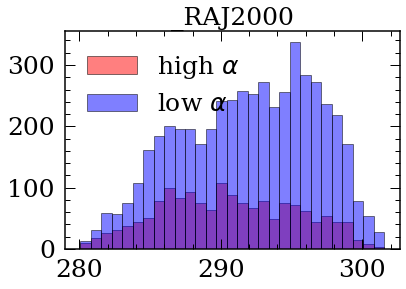

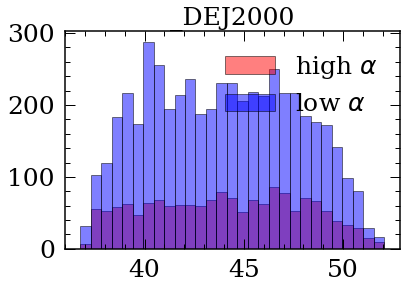

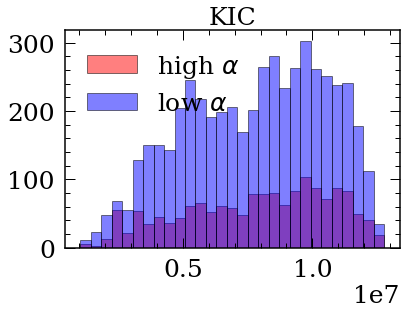

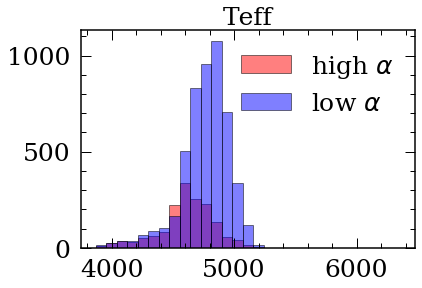

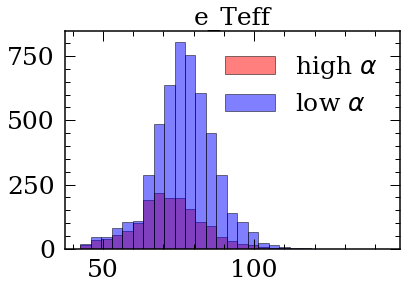

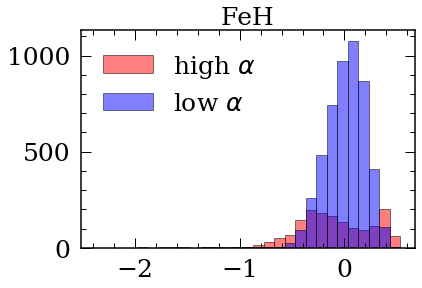

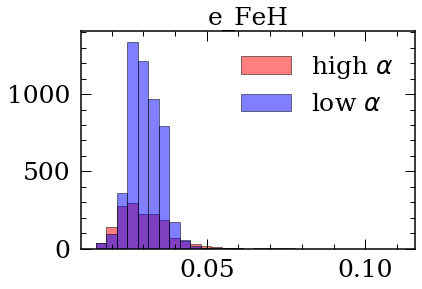

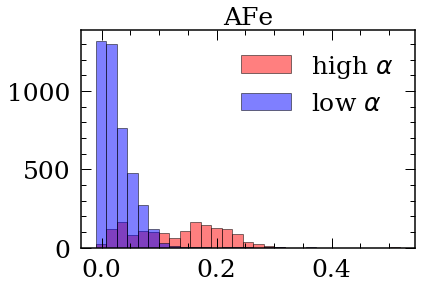

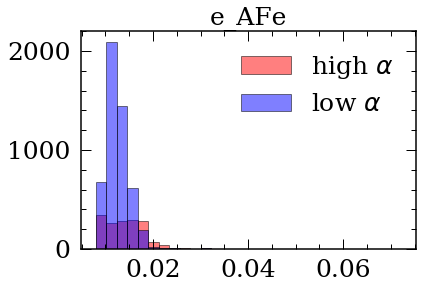

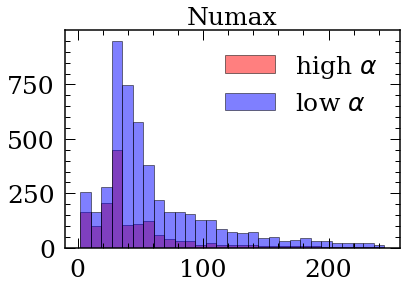

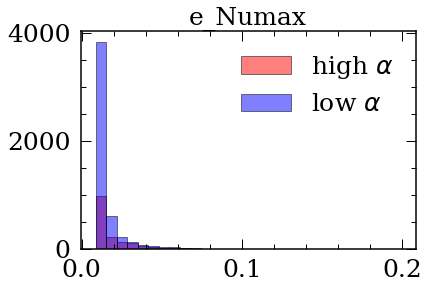

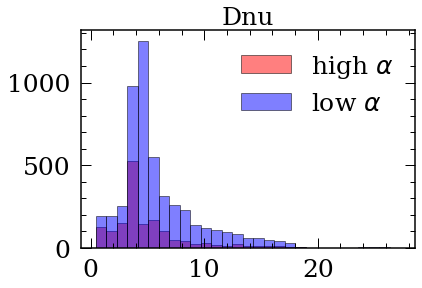

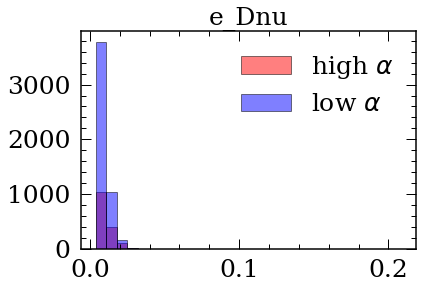

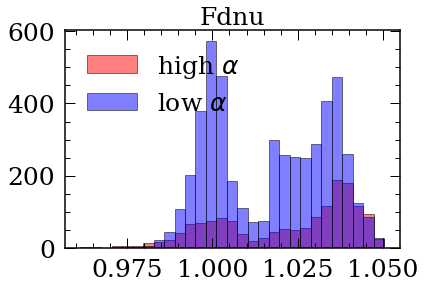

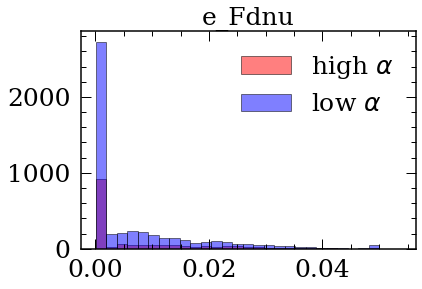

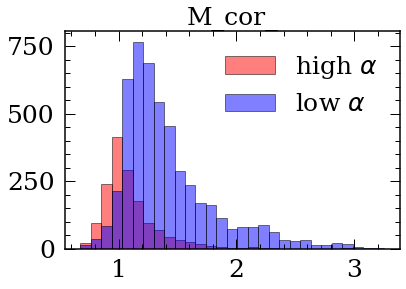

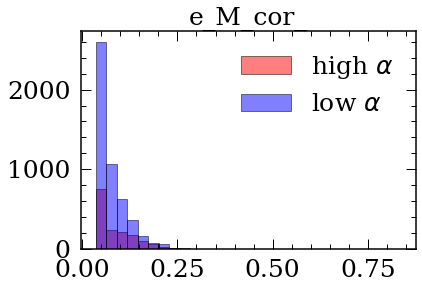

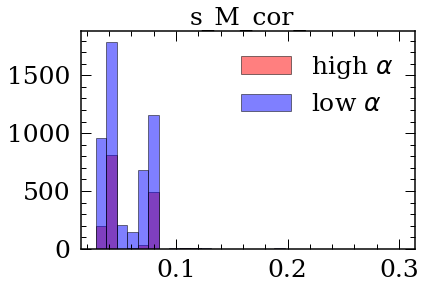

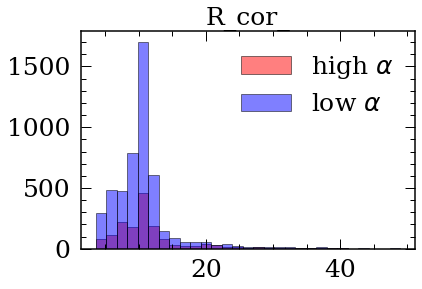

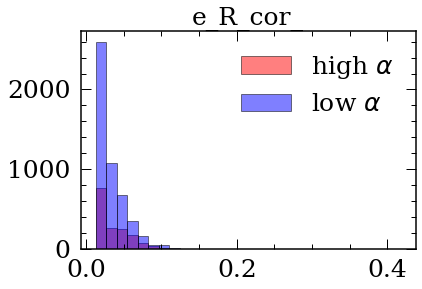

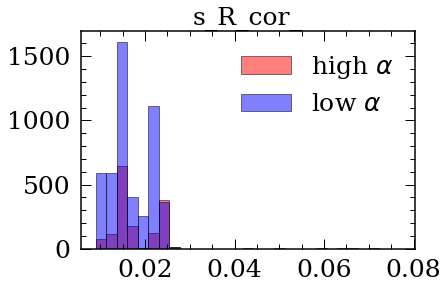

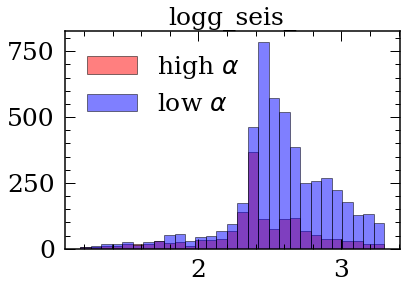

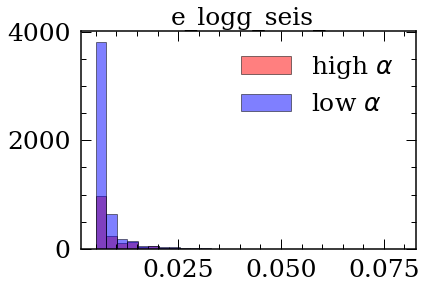

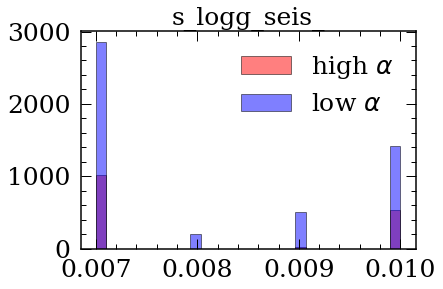

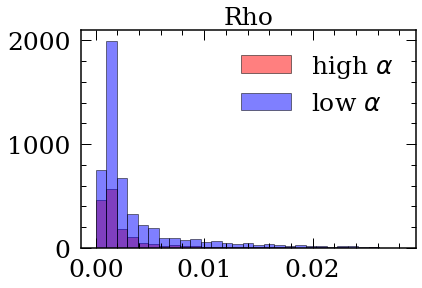

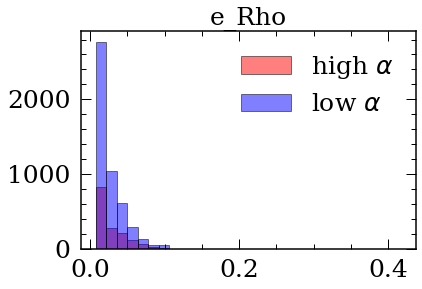

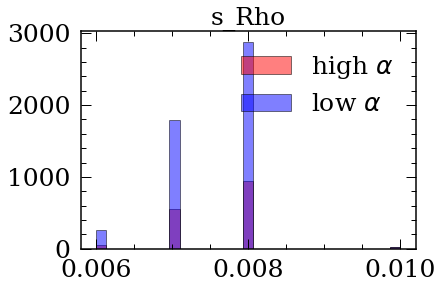

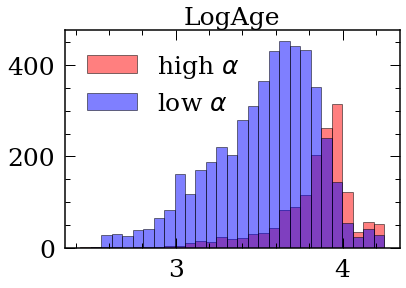

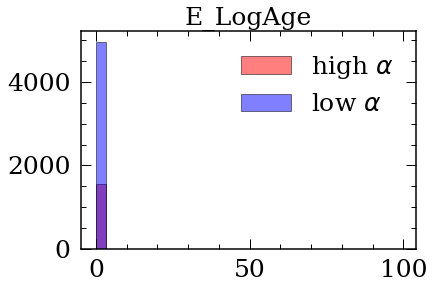

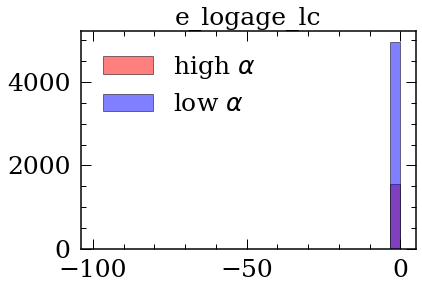

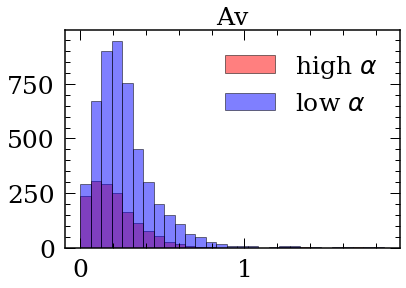

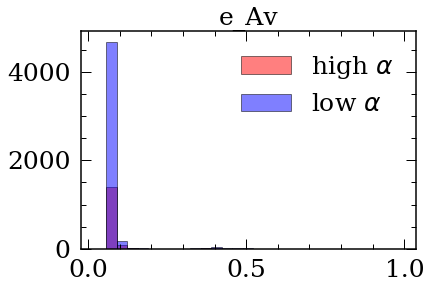

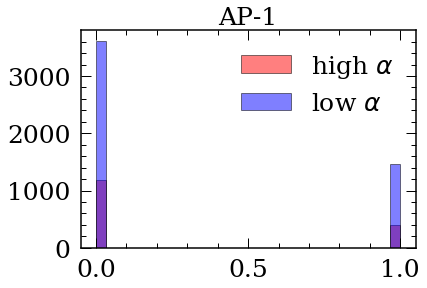

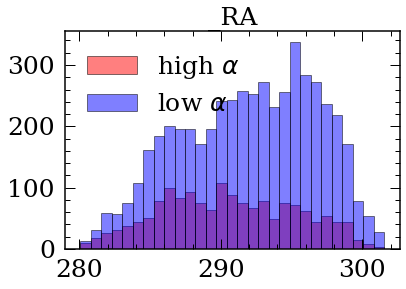

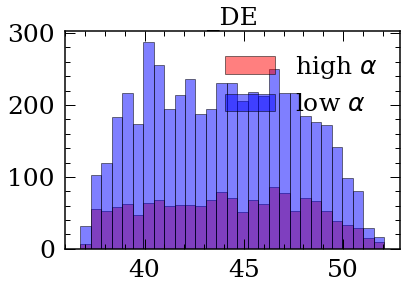

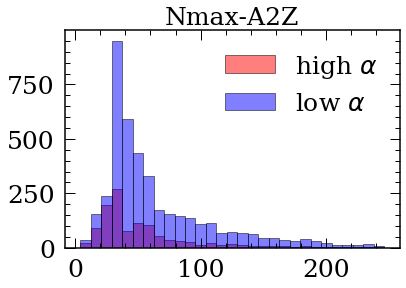

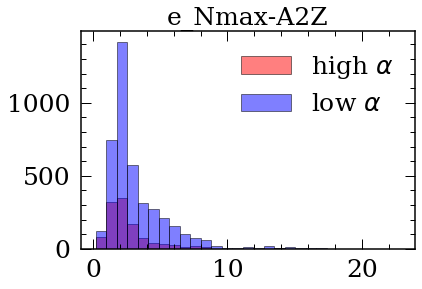

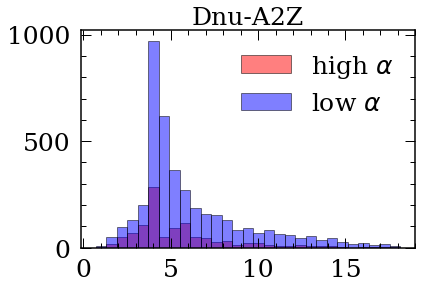

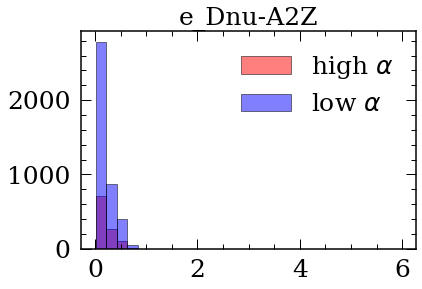

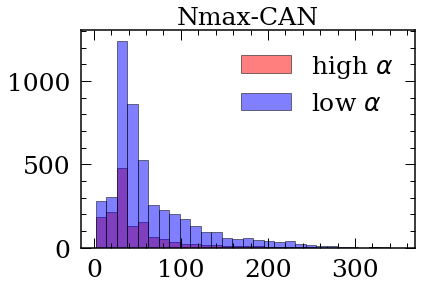

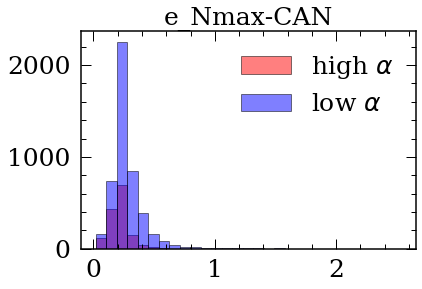

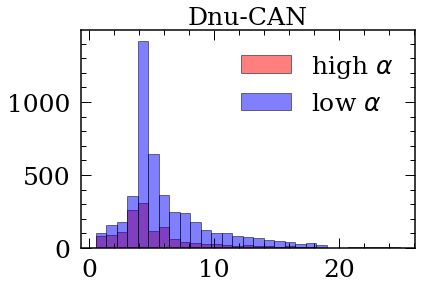

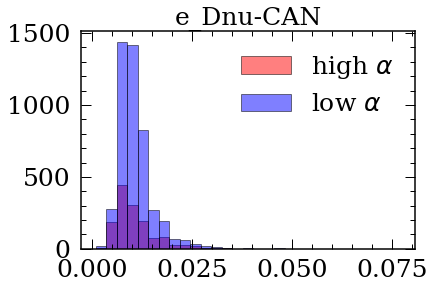

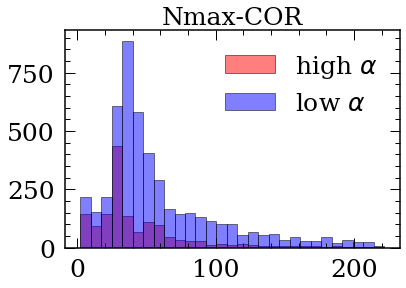

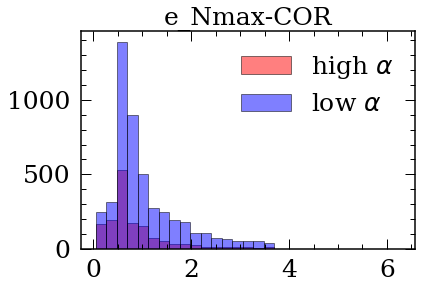

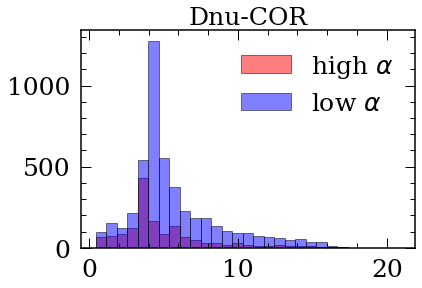

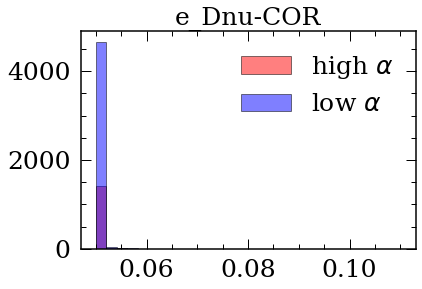

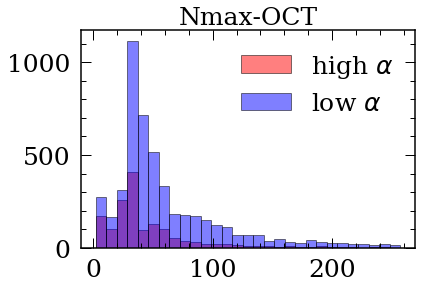

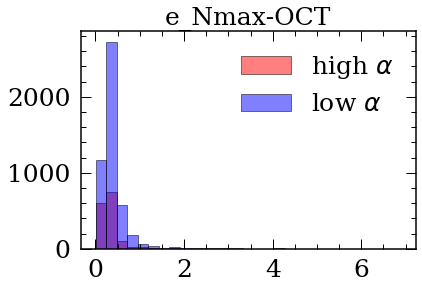

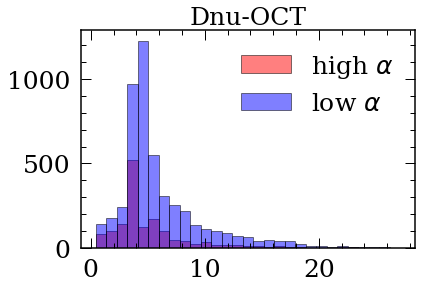

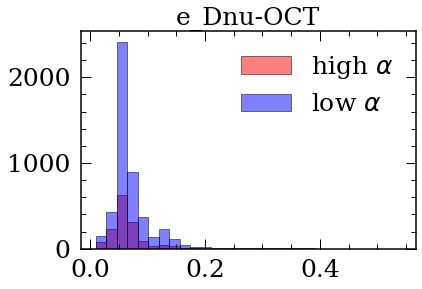

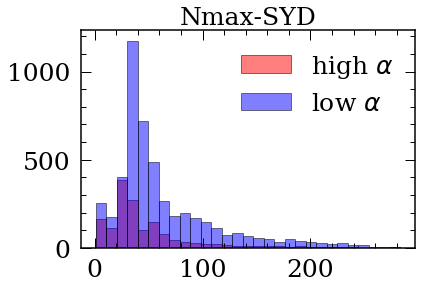

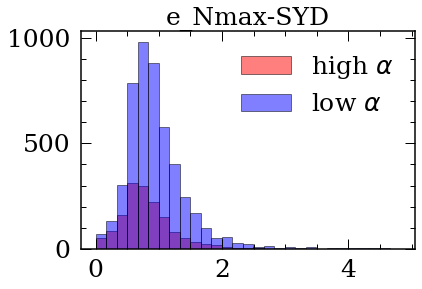

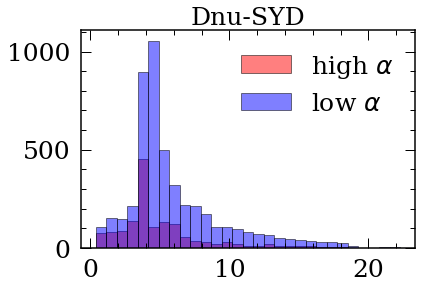

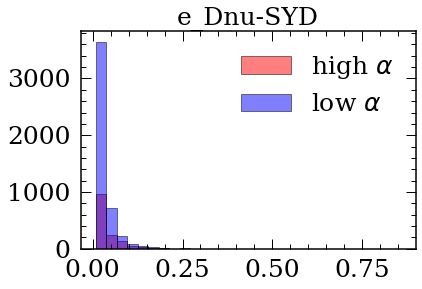

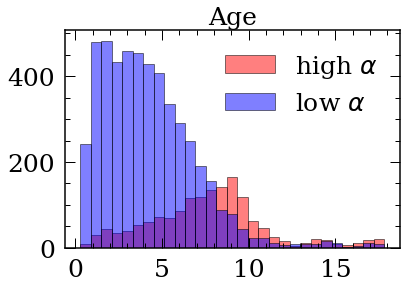

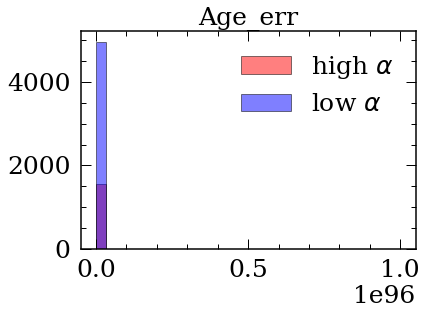

In [12]:
# plot histograms
for col in df.columns:
    print(col)
    if not type(df[col][0])==type('s'):
        high_alpha_p=high_alpha[col].dropna()
        low_alpha_p=low_alpha[col].dropna()
        bins=np.linspace(min([min(high_alpha_p),max(low_alpha_p)]),
                         max([max(high_alpha_p),min(low_alpha_p)]),30)
        plt.figure()
        plt.hist(high_alpha_p,bins=bins,alpha=0.5,color='r',edgecolor='k',label='high $\\alpha$')
        plt.hist(low_alpha_p,bins=bins,alpha=0.5,color='b',edgecolor='k',label='low $\\alpha$')
        plt.title(col,fontsize=25)
        plt.legend()

In [13]:
# CM with APOGEE

df_apo=pd.read_pickle('/Users/lucy/Desktop/ASTR/Columbia/GalacticArch/APOGEE.pkl')
df_apo['2MASS']=[i[2:] for i in df_apo['APOGEE_ID']]
df_apo['2MASS']


1         00000002+7417074
2         00000019-1924498
3         00000032+5737103
4         00000032+5737103
5         00000068+5710233
                ...       
473302    23595756+8535275
473303    23595837+5700444
473304    23595886-2009435
473305    23595886+5726058
473306    23595980+1528407
Name: 2MASS, Length: 473306, dtype: object

In [14]:
high_alpha

_RAJ2000   _DEJ2000         KIC            _2MASS         Teff  \
0     291.289042  36.749972   1027110.0  19250937+3644599  4177.600098   
2     290.886667  36.872417   1160789.0  19233280+3652207  4729.600098   
6     291.241292  36.891611   1162220.0  19245791+3653298  4190.100098   
7     291.359958  36.819889   1162746.0  19252639+3649116  4798.100098   
8     291.440167  36.846528   1163114.0  19254564+3650475  4285.799805   
...          ...        ...         ...               ...          ...   
6665  288.726917  51.876250  12688798.0  19145446+5152345  4199.100098   
6666  289.159750  51.864611  12689506.0  19163834+5151526  4937.299805   
6667  289.702125  51.868861  12690461.0  19184851+5152079  4749.799805   
6669  289.469000  51.911944  12735291.0  19175256+5154430  4718.399902   
6673  290.349000  52.083139  12785083.0  19212376+5204593  4689.100098   

         e_Teff    FeH  e_FeH    AFe  e_AFe  ...   Nmax-OCT  e_Nmax-OCT  \
0     51.799999 -0.232  0.025  0.205  0.015  ...   6.330000        0.07   
2     72.300003 -0.257  0.034  0.188  0.015  ...  25.549999        0.25   
6     51.700001  0.083  0.021  0.070  0.011  ...  11.040000        0.07   
7     75.599998 -0.388  0.038  0.229  0.017  ...  28.059999        0.25   
8     54.400002  0.297  0.020  0.025  0.010  ...  14.440000        0.17   
...         ...    ...    ...    ...    ...  ...        ...         ...   
6665  53.799999  0.315  0.019  0.032  0.010  ...  14.680000        0.25   
6666  92.400002 -0.333  0.039  0.218  0.017  ...        NaN         NaN   
6667  77.099998 -0.240  0.034  0.191  0.015  ...  29.190001        0.25   
6669  82.000000 -0.088  0.030  0.106  0.014  ...  29.879999        0.22   
6673  70.000000 -0.001  0.029  0.083  0.012  ...  28.490000        0.23   

      Dnu-OCT  e_Dnu-OCT Nmax-SYD  e_Nmax-SYD  Dnu-SYD  e_Dnu-SYD        Age  \
0        1.15       0.03    6.590       0.233    1.146      0.018  10.046155   
2        3.52       0.05   25.221       0.760    3.529      0.063   7.744617   
6        1.64       0.03   10.993       0.400    1.661      0.019  11.376279   
7        3.78       0.06   28.042       1.268    3.710      0.128   6.109420   
8        1.86       0.03   14.349       0.671    1.895      0.013   3.451438   
...       ...        ...      ...         ...      ...        ...        ...   
6665     1.96       0.03   13.658       0.995    2.016      0.064  10.471285   
6666     4.30       0.05      NaN         NaN      NaN        NaN   1.566751   
6667     3.85       0.06   27.130       1.456    3.850      0.106   7.834297   
6669     3.98       0.07   30.636       0.717    4.018      0.033   7.396052   
6673     3.65       0.06   28.994       1.756    3.534      0.148   4.415704   

       Age_err  
0     0.001603  
2     0.001358  
6     0.001222  
7     0.001377  
8     0.001199  
...        ...  
6665  0.001652  
6666  0.002168  
6667  0.001321  
6669  0.001169  
6673  0.001611  

[1583 rows x 63 columns]

In [15]:
df_cm_ha=pd.merge(high_alpha,df_apo,left_on='_2MASS',right_on='2MASS',how='inner')
df_cm_la=pd.merge(low_alpha,df_apo,left_on='_2MASS',right_on='2MASS',how='inner')


In [16]:
list(df_cm_ha.columns)

['_RAJ2000',
 '_DEJ2000',
 'KIC',
 '_2MASS',
 'Teff',
 'e_Teff',
 'FeH',
 'e_FeH',
 'AFe',
 'e_AFe',
 'Numax',
 'e_Numax',
 'Dnu',
 'e_Dnu',
 'ES',
 'Fdnu',
 'e_Fdnu',
 'M_cor_',
 'e_M_cor_',
 's_M_cor_',
 'R_cor_',
 'e_R_cor_',
 's_R_cor_',
 'logg_seis_',
 'e_logg_seis_',
 's_logg_seis_',
 'Rho',
 'e_Rho',
 's_Rho',
 'LogAge',
 'E_LogAge',
 'e_logage_lc',
 'Av',
 'e_Av',
 'Notes',
 'AP-1',
 'KCat',
 'Sloan',
 'Simbad',
 '_RA',
 '_DE',
 'Nmax-A2Z',
 'e_Nmax-A2Z',
 'Dnu-A2Z',
 'e_Dnu-A2Z',
 'Nmax-CAN',
 'e_Nmax-CAN',
 'Dnu-CAN',
 'e_Dnu-CAN',
 'Nmax-COR',
 'e_Nmax-COR',
 'Dnu-COR',
 'e_Dnu-COR',
 'Nmax-OCT',
 'e_Nmax-OCT',
 'Dnu-OCT',
 'e_Dnu-OCT',
 'Nmax-SYD',
 'e_Nmax-SYD',
 'Dnu-SYD',
 'e_Dnu-SYD',
 'Age',
 'Age_err',
 'APSTAR_ID',
 'TARGET_ID',
 'ASPCAP_ID',
 'FILE',
 'APOGEE_ID',
 'TELESCOPE',
 'LOCATION_ID',
 'FIELD',
 'J',
 'J_ERR',
 'H',
 'H_ERR',
 'K',
 'K_ERR',
 'RA',
 'DEC',
 'GLON',
 'GLAT',
 'APOGEE_TARGET1',
 'APOGEE_TARGET2',
 'APOGEE_TARGET3',
 'APOGEE2_TARGET1',
 'APOGE

In [17]:
abun_apog=['M_H','C_FE','N_FE','O_FE','NA_FE','MG_FE','AL_FE','SI_FE','S_FE','K_FE','CA_FE','TI_FE',
           'V_FE','MN_FE','NI_FE','P_FE','CR_FE','CO_FE','RB_FE']

abun_apog_err=[i+'_ERR' for i in abun_apog]

abund={'C_FE':'[CI/','MG_FE':'[MgI/','AL_FE':'[AlI/','SI_FE':'[SiI/','S_FE':'[ScI/',
       'CA_FE':'[CaI/','TI_FE':'[TiI/','CR_FE':'[CrI/','MN_FE':'[MnI/','CO_FE':'[CoI/',
       'NI_FE':'[NiI/','CU_FE':'[CuI/','O_FE':'[O/','NA_FE':'[Na/','K_FE':'[K/','V_FE':'[V/',
      'P_FE':'[P/','RB_FE':'[Rb/','N_FE':'[N/','M_H':'[Fe/'}


df_abun_ha=df_cm_ha[np.append(abun_apog,np.append(abun_apog_err,['Age','Age_err','FeH','2MASS','Teff','AFe']))].dropna()
df_abun_st_ha=df_abun_ha.loc[abs(df_abun_ha['FeH']<0.05)]

df_abun_la=df_cm_la[np.append(abun_apog,np.append(abun_apog_err,['Age','Age_err','FeH','2MASS','Teff','AFe']))].dropna()
df_abun_st_la=df_abun_la.loc[abs(df_abun_la['FeH']<0.05)]


1566
4611.749624435016


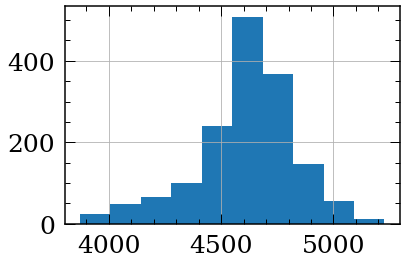

In [18]:
print(len(df_abun_ha))
print(np.mean(df_abun_ha['Teff']))
df_abun_ha['Teff'].hist()



In [19]:
rangeTeff=50

df_abun_st_ha=df_abun_ha.loc[abs(df_abun_ha['Teff']-4611)<rangeTeff]
df_abun_st_la=df_abun_la.loc[abs(df_abun_la['Teff']-4611)<rangeTeff]


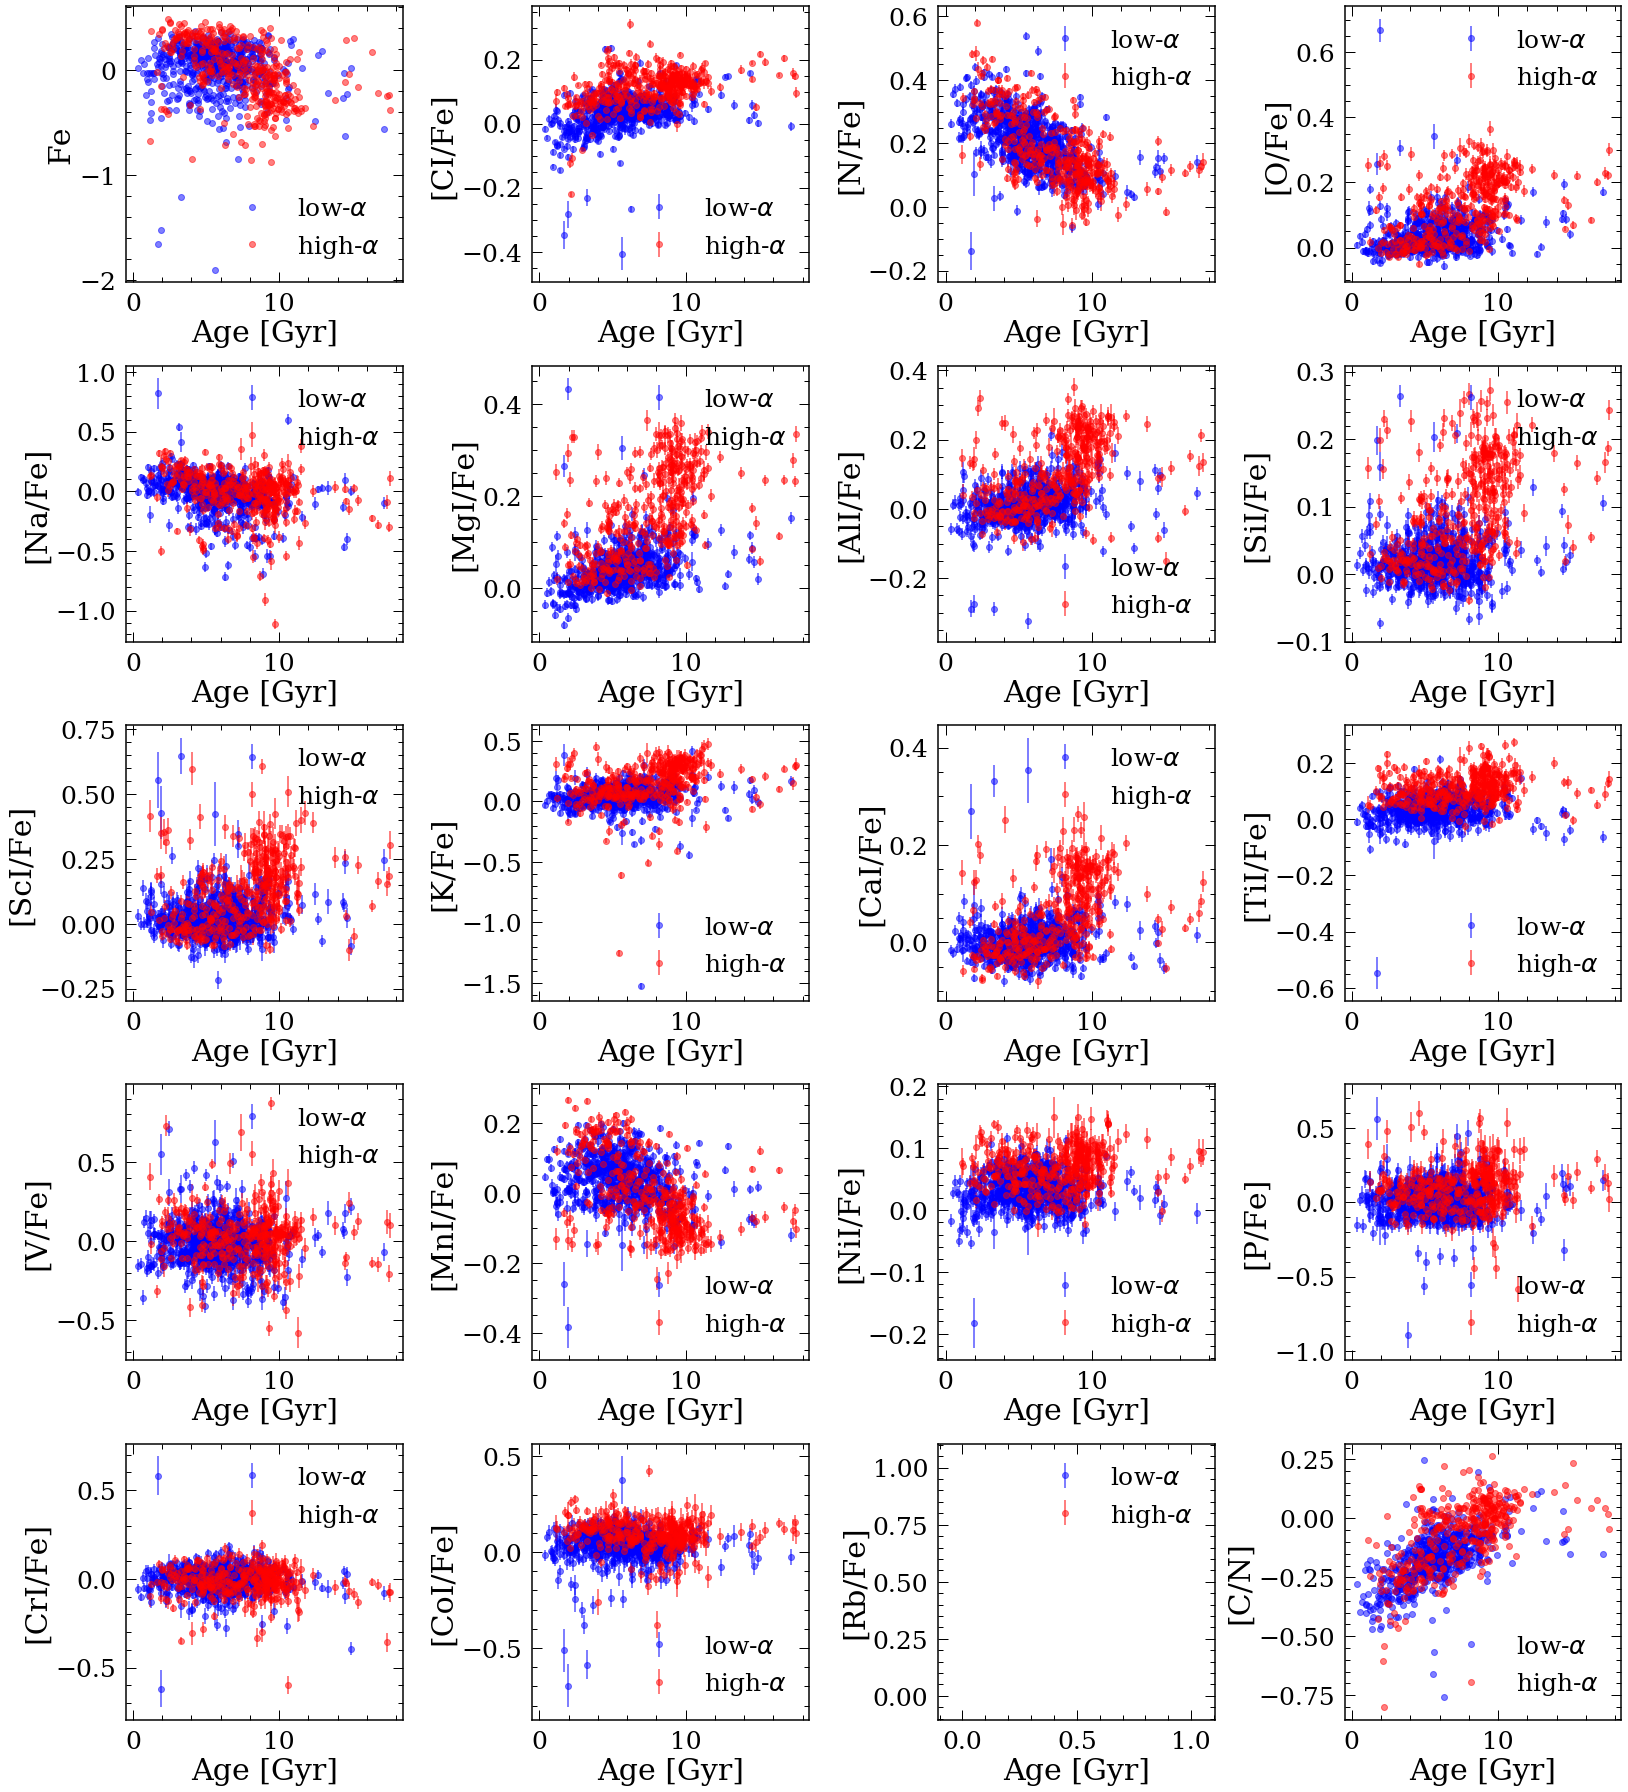

In [20]:
plt.figure(figsize=(22.5,25))
for i in range(1,len(abun_apog)):
    df_plot_ha=df_abun_st_ha.loc[df_abun_st_ha[abun_apog[i]]>-100]
    df_plot_ha=df_plot_ha.reset_index(drop=True)
    
    df_plot_la=df_abun_st_la.loc[df_abun_st_la[abun_apog[i]]>-100]
    df_plot_la=df_plot_la.reset_index(drop=True)
    
    plt.subplot(5,4,i+1)
    plt.errorbar(df_plot_la['Age'],df_plot_la[abun_apog[i]],yerr=df_plot_la[abun_apog[i]+'_ERR'],fmt='bo',alpha=0.5,label='low-$\\alpha$')
    plt.errorbar(df_plot_ha['Age'],df_plot_ha[abun_apog[i]],yerr=df_plot_ha[abun_apog[i]+'_ERR'],fmt='ro',alpha=0.5,label='high-$\\alpha$')
    
    
    plt.ylabel(abund[abun_apog[i]]+'Fe]')
    plt.xlabel('Age [Gyr]')
    plt.legend()
    
# For Fe
df_plot_ha=df_abun_st_ha.loc[df_abun_st_ha['M_H']>-100]
df_plot_ha=df_plot_ha.reset_index(drop=True)
    
df_plot_la=df_abun_st_la.loc[df_abun_st_la['M_H']>-100]
df_plot_la=df_plot_la.reset_index(drop=True)
    
plt.subplot(5,4,1)
plt.errorbar(df_plot_la['Age'],df_plot_la['M_H'],fmt='bo',alpha=0.5,label='low-$\\alpha$')
plt.errorbar(df_plot_ha['Age'],df_plot_ha['M_H'],fmt='ro',alpha=0.5,label='high-$\\alpha$')
    
plt.ylabel('Fe')
plt.xlabel('Age [Gyr]')
plt.legend()
 
# for C/N
df_plot_ha=df_abun_st_ha.loc[df_abun_st_ha['C_FE']>-100]
df_plot_ha=df_plot_ha.loc[df_plot_ha['N_FE']>-100]
df_plot_ha=df_plot_ha.reset_index(drop=True)
    
df_plot_la=df_abun_st_la.loc[df_abun_st_la['C_FE']>-100]
df_plot_la=df_plot_la.loc[df_plot_la['N_FE']>-100]
df_plot_la=df_plot_la.reset_index(drop=True)
    
plt.subplot(5,4,20)
plt.errorbar(df_plot_la['Age'],df_plot_la['C_FE']-df_plot_la['N_FE'],
             fmt='bo',alpha=0.5,label='low-$\\alpha$')
plt.errorbar(df_plot_ha['Age'],df_plot_ha['C_FE']-df_plot_ha['N_FE'],
             fmt='ro',alpha=0.5,label='high-$\\alpha$')
    
plt.ylabel('[C/N]')
plt.xlabel('Age [Gyr]')
plt.legend()


plt.tight_layout()

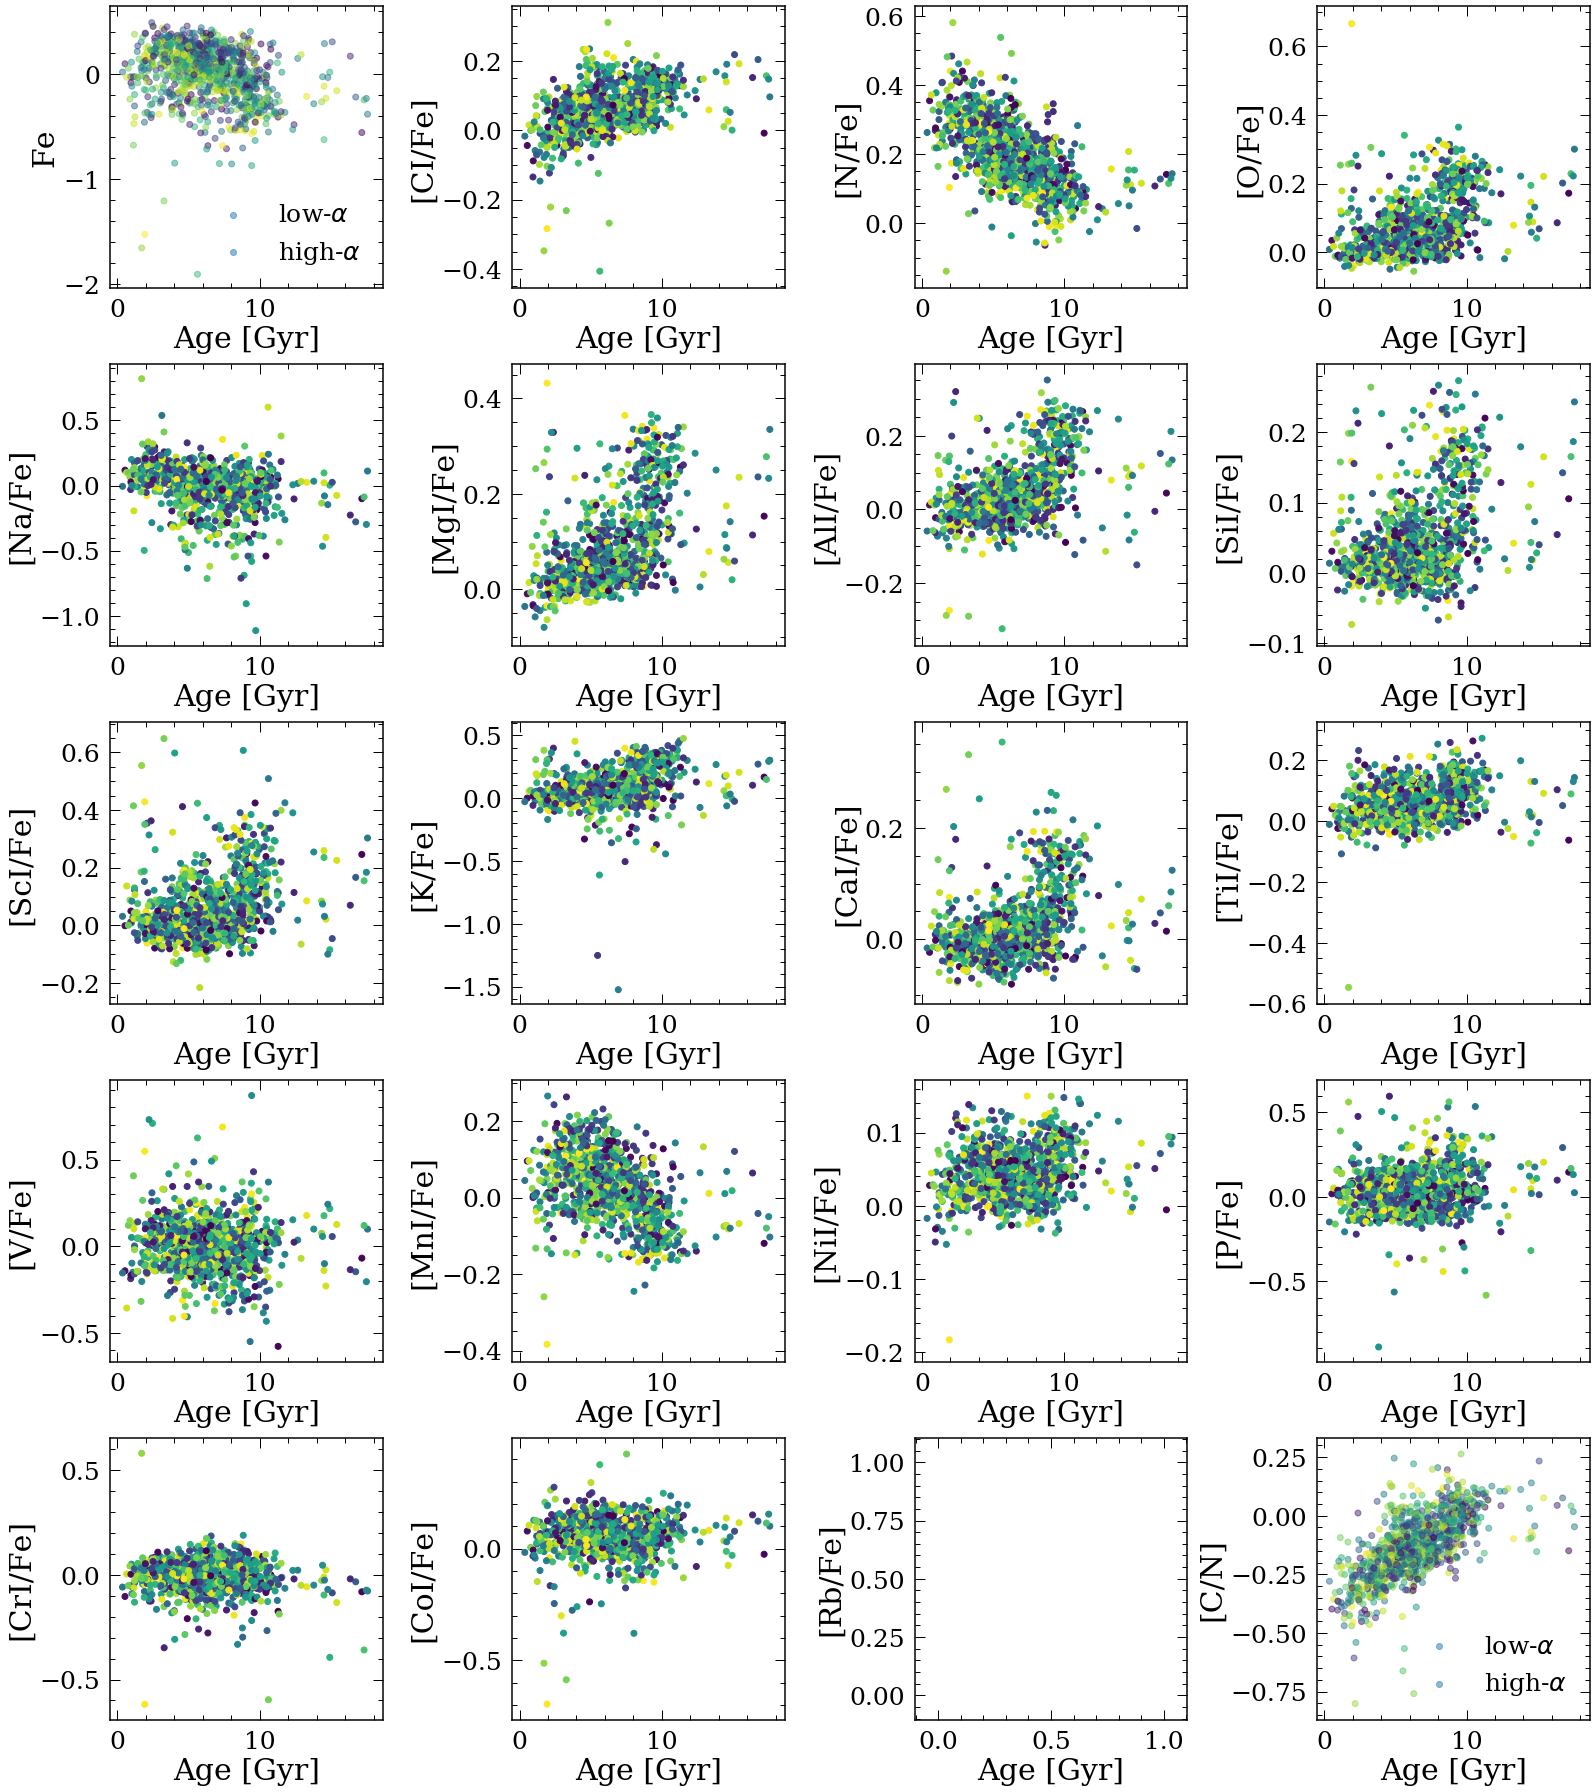

In [21]:
plt.figure(figsize=(22.5,25))
cm = plt.cm.get_cmap('viridis',5)
for i in range(1,len(abun_apog)):
    df_plot_ha=df_abun_st_ha.loc[df_abun_st_ha[abun_apog[i]]>-100]
    df_plot_ha=df_plot_ha.reset_index(drop=True)
    
    df_plot_la=df_abun_st_la.loc[df_abun_st_la[abun_apog[i]]>-100]
    df_plot_la=df_plot_la.reset_index(drop=True)
    
    
    plt.subplot(5,4,i+1)
    plt.scatter(df_plot_la['Age'],df_plot_la[abun_apog[i]],c=df_plot_la['Teff'],vmin=4611-rangeTeff,vmax=4611+rangeTeff)
    plt.scatter(df_plot_ha['Age'],df_plot_ha[abun_apog[i]],c=df_plot_ha['Teff'],vmin=4611-rangeTeff,vmax=4611+rangeTeff)
    plt.ylabel(abund[abun_apog[i]]+'Fe]')
    plt.xlabel('Age [Gyr]')
    
# For Fe
df_plot_ha=df_abun_st_ha.loc[df_abun_st_ha['M_H']>-100]
df_plot_ha=df_plot_ha.reset_index(drop=True)
    
df_plot_la=df_abun_st_la.loc[df_abun_st_la['M_H']>-100]
df_plot_la=df_plot_la.reset_index(drop=True)
    
plt.subplot(5,4,1)
plt.scatter(df_plot_la['Age'],df_plot_la['M_H'],c=df_plot_la['Teff'],vmin=4611-rangeTeff,vmax=4611+rangeTeff,
            alpha=0.5,label='low-$\\alpha$')
plt.scatter(df_plot_ha['Age'],df_plot_ha['M_H'],c=df_plot_ha['Teff'],vmin=4611-rangeTeff,vmax=4611+rangeTeff,
            alpha=0.5,label='high-$\\alpha$')
    
plt.ylabel('Fe')
plt.xlabel('Age [Gyr]')
plt.legend()
 
# for C/N
df_plot_ha=df_abun_st_ha.loc[df_abun_st_ha['C_FE']>-100]
df_plot_ha=df_plot_ha.loc[df_plot_ha['N_FE']>-100]
df_plot_ha=df_plot_ha.reset_index(drop=True)
    
df_plot_la=df_abun_st_la.loc[df_abun_st_la['C_FE']>-100]
df_plot_la=df_plot_la.loc[df_plot_la['N_FE']>-100]
df_plot_la=df_plot_la.reset_index(drop=True)
    
plt.subplot(5,4,20)
plt.scatter(df_plot_la['Age'],df_plot_la['C_FE']-df_plot_la['N_FE'],
             c=df_plot_la['Teff'],alpha=0.5,vmin=4611-rangeTeff,vmax=4611+rangeTeff,label='low-$\\alpha$')
plt.scatter(df_plot_ha['Age'],df_plot_ha['C_FE']-df_plot_ha['N_FE'],
             c=df_plot_ha['Teff'],alpha=0.5,vmin=4611-rangeTeff,vmax=4611+rangeTeff,label='high-$\\alpha$')
    
plt.ylabel('[C/N]')
plt.xlabel('Age [Gyr]')
plt.legend()


plt.tight_layout()

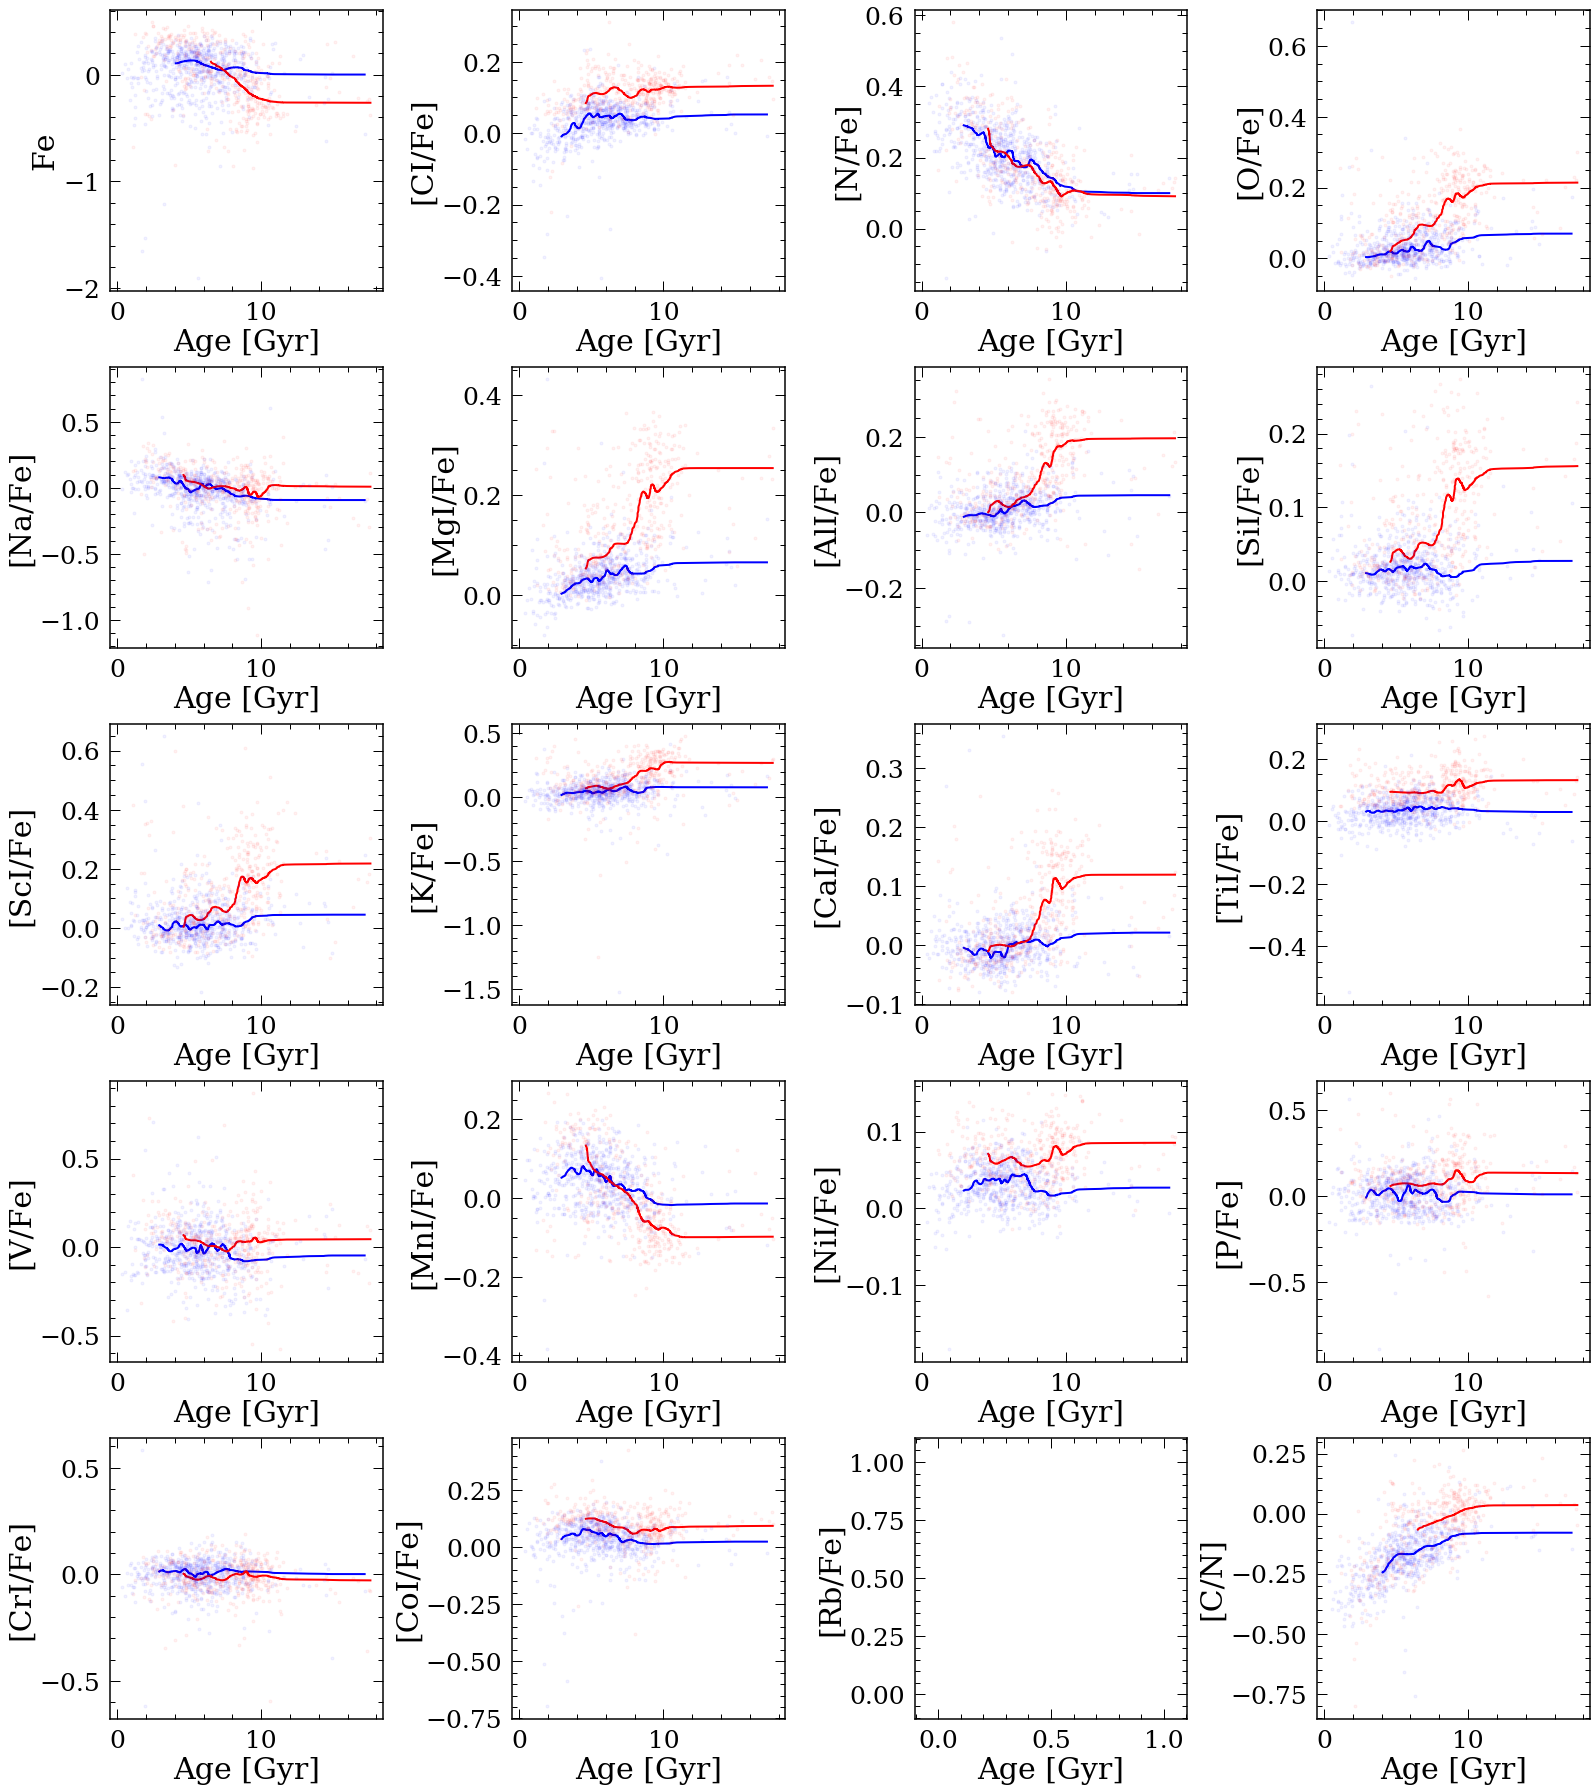

In [22]:
## running median
rn=30

from scipy.ndimage import gaussian_filter


plt.figure(figsize=(22.5,25))
for i in range(1,len(abun_apog)):
    df_plot_ha=df_abun_st_ha.loc[df_abun_st_ha[abun_apog[i]]>-100]
    df_plot_ha=df_plot_ha.reset_index(drop=True)
    
    df_plot_la=df_abun_st_la.loc[df_abun_st_la[abun_apog[i]]>-100]
    df_plot_la=df_plot_la.reset_index(drop=True)
    
    
    df_plot_la=df_plot_la.sort_values(by=['Age'])
    df_plot_ha=df_plot_ha.sort_values(by=['Age'])
    
    larm=gaussian_filter(df_plot_la[abun_apog[i]].rolling(rn).median(), sigma=10)
    harm=gaussian_filter(df_plot_ha[abun_apog[i]].rolling(rn).median(), sigma=10)
    
    plt.subplot(5,4,i+1)
    plt.errorbar(df_plot_la['Age'],df_plot_la[abun_apog[i]],fmt='b.',alpha=0.05,label='low-$\\alpha$')
    plt.errorbar(df_plot_ha['Age'],df_plot_ha[abun_apog[i]],fmt='r.',alpha=0.05,label='high-$\\alpha$')
    
    if len(df_plot_la['Age'])!=0:    
        laage,larm=zip(*sorted(zip(df_plot_la['Age'][(rn-1):],larm[(rn-1):])))
        haage,harm=zip(*sorted(zip(df_plot_ha['Age'][(rn-1):],harm[(rn-1):])))
        
        plt.plot(laage,larm,'b-',alpha=1,linewidth=2,label='low-$\\alpha$')
        plt.plot(haage,harm,'r-',alpha=1,linewidth=2,label='high-$\\alpha$')
    
    
    plt.ylabel(abund[abun_apog[i]]+'Fe]')
    plt.xlabel('Age [Gyr]')
    #plt.legend()
    
    
# For Fe
df_plot_ha=df_abun_st_ha.loc[df_abun_st_ha['M_H']>-100]
df_plot_ha=df_plot_ha.reset_index(drop=True)
    
df_plot_la=df_abun_st_la.loc[df_abun_st_la['M_H']>-100]
df_plot_la=df_plot_la.reset_index(drop=True)
    
df_plot_la=df_plot_la.sort_values(by=['Age'])
df_plot_ha=df_plot_ha.sort_values(by=['Age'])
    
larm=gaussian_filter(df_plot_la['M_H'].rolling(rn).median(),sigma=30)
harm=gaussian_filter(df_plot_ha['M_H'].rolling(rn).median(),sigma=30)
    
plt.subplot(5,4,1)
plt.errorbar(df_plot_la['Age'],df_plot_la['M_H'],fmt='b.',alpha=0.05,label='low-$\\alpha$')
plt.errorbar(df_plot_ha['Age'],df_plot_ha['M_H'],fmt='r.',alpha=0.05,label='high-$\\alpha$')

laage,larm=zip(*sorted(zip(df_plot_la['Age'][(rn-1):],larm[(rn-1):])))
haage,harm=zip(*sorted(zip(df_plot_ha['Age'][(rn-1):],harm[(rn-1):])))
    
plt.plot(laage,larm,'b-',alpha=1,linewidth=2,label='low-$\\alpha$')
plt.plot(haage,harm,'r-',alpha=1,linewidth=2,label='high-$\\alpha$')
    
plt.ylabel('Fe')
plt.xlabel('Age [Gyr]')
#plt.legend()
 
# for C/N
df_plot_ha=df_abun_st_ha.loc[df_abun_st_ha['C_FE']>-100]
df_plot_ha=df_plot_ha.loc[df_plot_ha['N_FE']>-100]
df_plot_ha['C_N']=df_plot_ha['C_FE']-df_plot_ha['N_FE']
df_plot_ha=df_plot_ha.reset_index(drop=True)
    
df_plot_la=df_abun_st_la.loc[df_abun_st_la['C_FE']>-100]
df_plot_la=df_plot_la.loc[df_plot_la['N_FE']>-100]
df_plot_la['C_N']=df_plot_la['C_FE']-df_plot_la['N_FE']
df_plot_la=df_plot_la.reset_index(drop=True)

df_plot_la=df_plot_la.sort_values(by=['Age'])
df_plot_ha=df_plot_ha.sort_values(by=['Age'])    
    
larm=gaussian_filter(df_plot_la['C_N'].rolling(rn).median(),sigma=30)
harm=gaussian_filter(df_plot_ha['C_N'].rolling(rn).median(),sigma=30)
    
plt.subplot(5,4,20)
plt.errorbar(df_plot_la['Age'],df_plot_la['C_N'],fmt='b.',alpha=0.05,label='low-$\\alpha$')
plt.errorbar(df_plot_ha['Age'],df_plot_ha['C_N'],fmt='r.',alpha=0.05,label='high-$\\alpha$')
    
laage,larm=zip(*sorted(zip(df_plot_la['Age'][(rn-1):],larm[(rn-1):])))
haage,harm=zip(*sorted(zip(df_plot_ha['Age'][(rn-1):],harm[(rn-1):])))
    
plt.plot(laage,larm,'b-',alpha=1,linewidth=2,label='low-$\\alpha$')
plt.plot(haage,harm,'r-',alpha=1,linewidth=2,label='high-$\\alpha$')
    
plt.ylabel('[C/N]')
plt.xlabel('Age [Gyr]')
#plt.legend()

plt.tight_layout()

plt.savefig('abund.png')

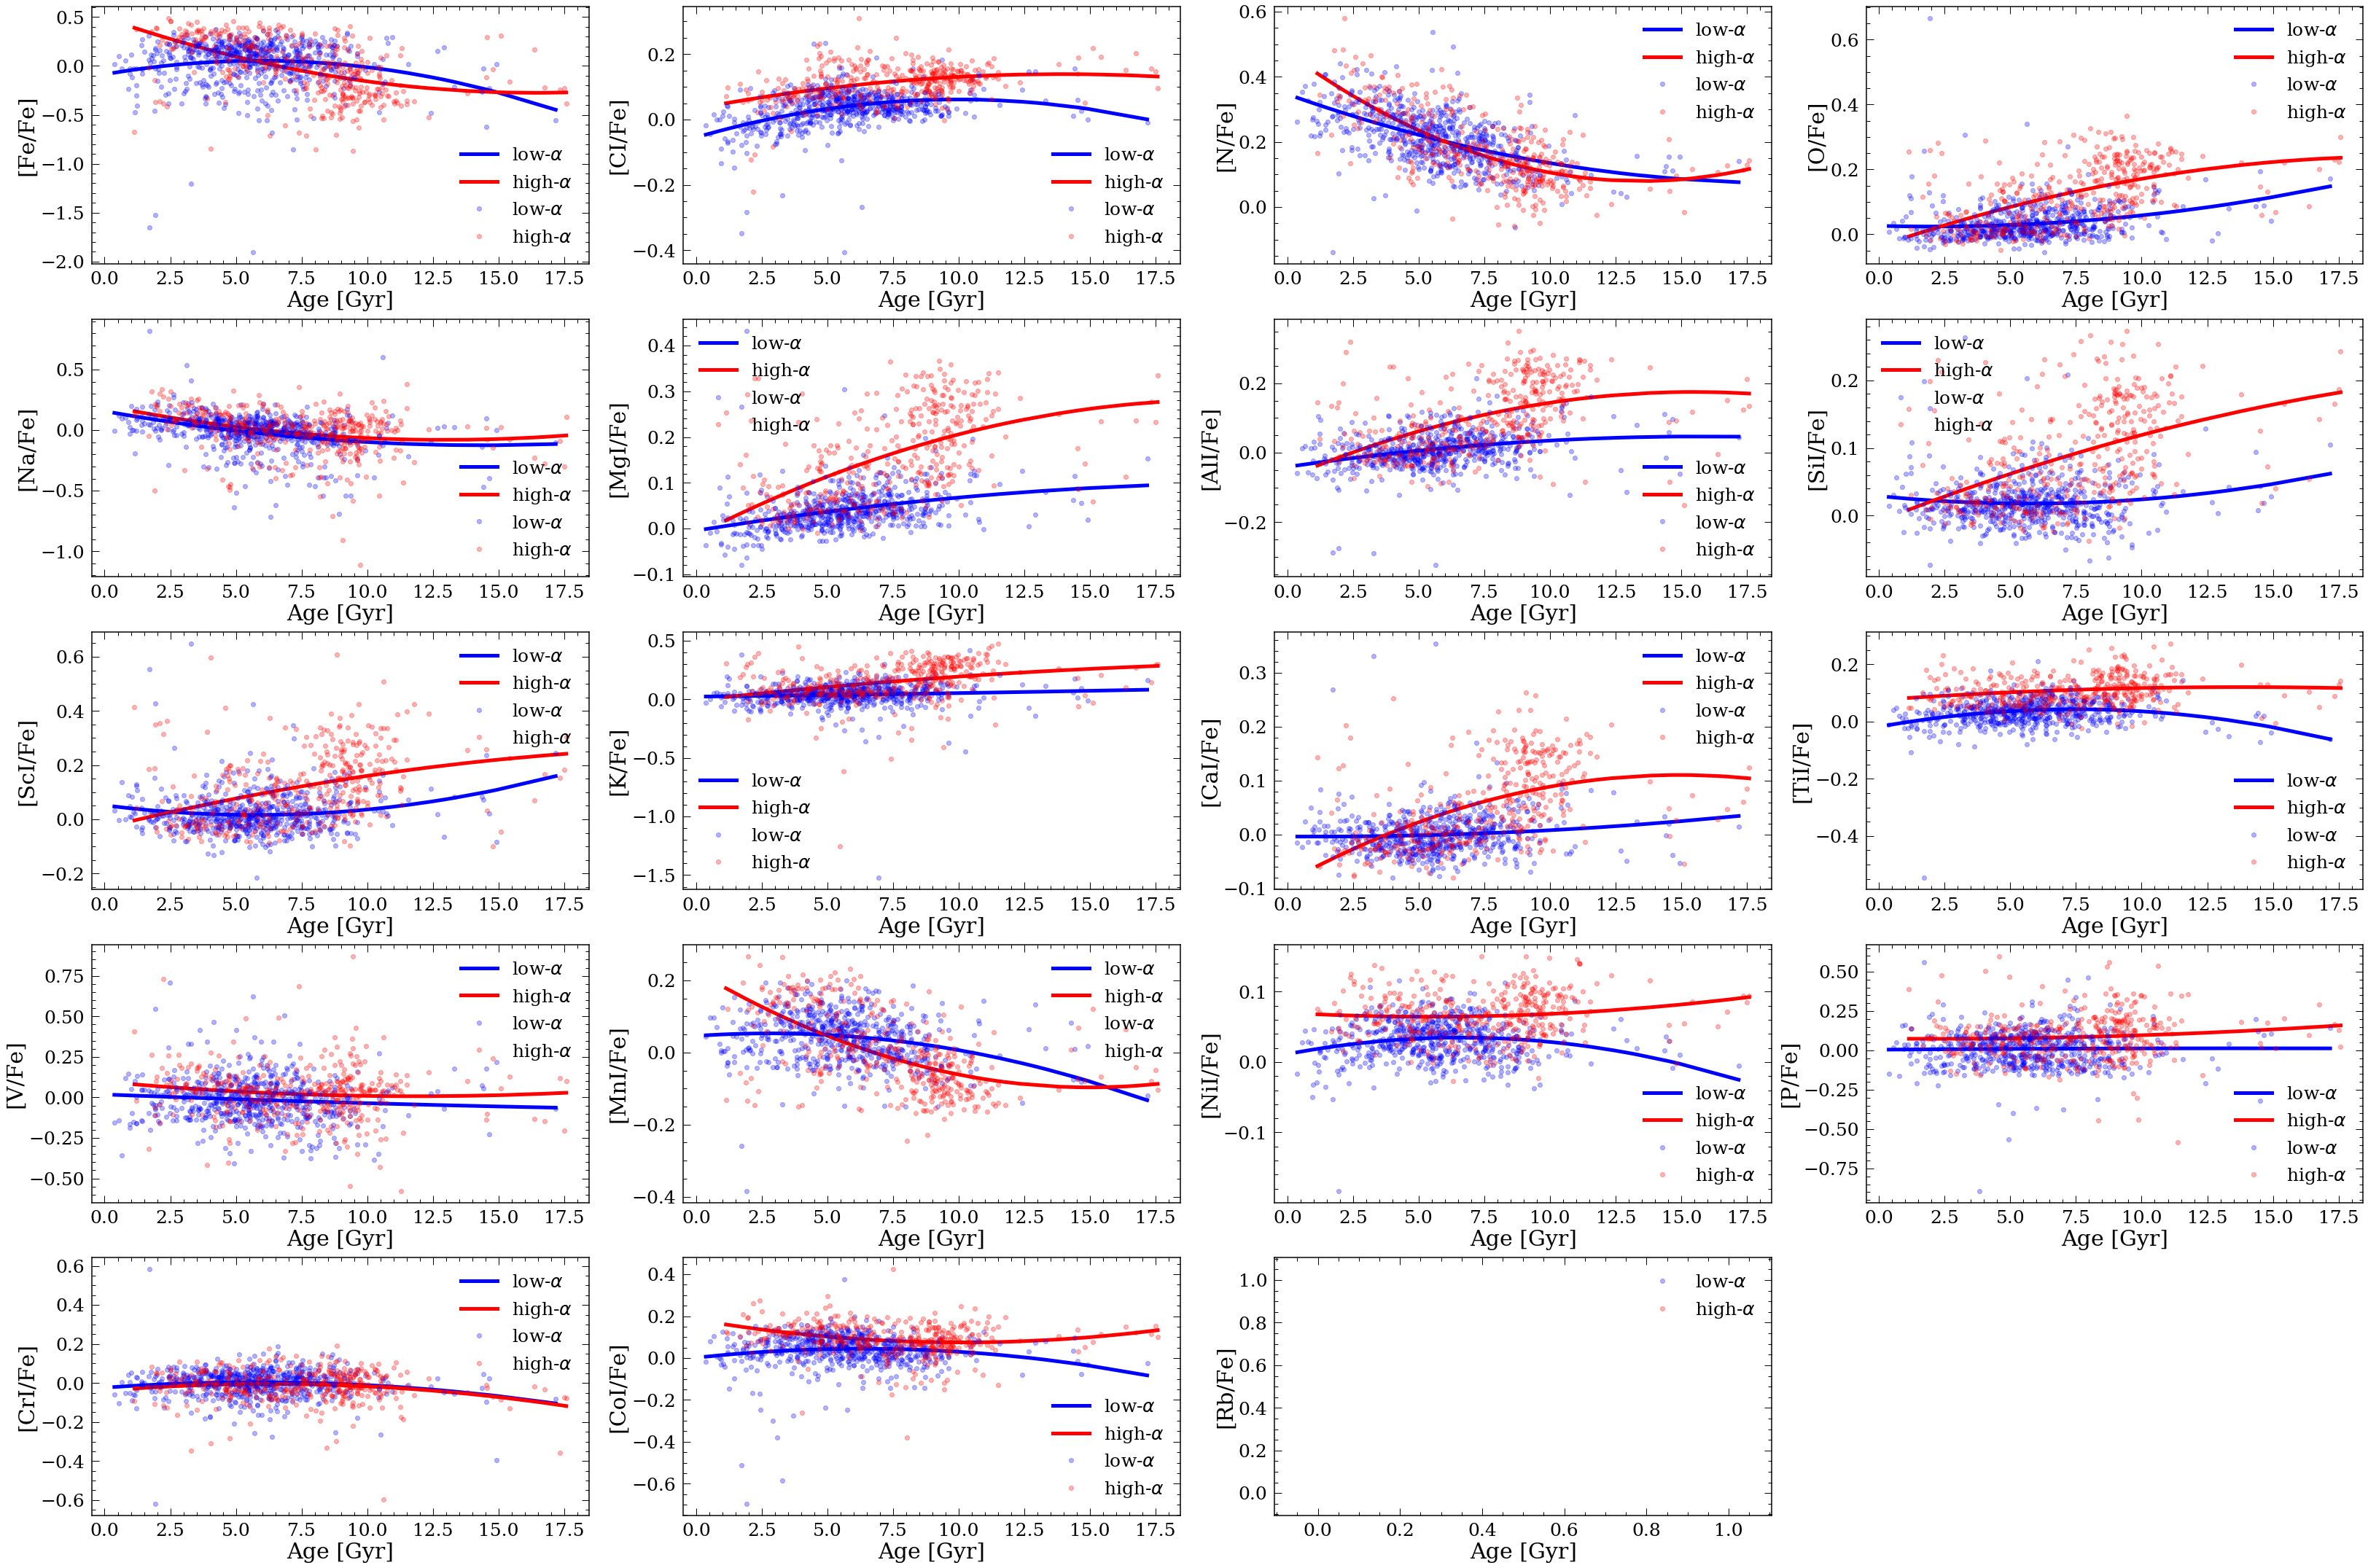

In [23]:
# poly fit

plt.figure(figsize=(45,30))
for i in range(len(abun_apog)):
    df_plot_ha=df_abun_st_ha.loc[df_abun_st_ha[abun_apog[i]]>-100]
    df_plot_ha=df_plot_ha.reset_index(drop=True)
    
    df_plot_la=df_abun_st_la.loc[df_abun_st_la[abun_apog[i]]>-100]
    df_plot_la=df_plot_la.reset_index(drop=True)
    
    df_plot_la=df_plot_la.sort_values(by=['Age'])
    df_plot_ha=df_plot_ha.sort_values(by=['Age'])
    
    if len(df_plot_la['Age'])!=0:
        zl = np.polyfit(df_plot_la['Age'],df_plot_la[abun_apog[i]],2)
        pl = np.poly1d(zl)
    
        zh = np.polyfit(df_plot_ha['Age'],df_plot_ha[abun_apog[i]],2)
        ph = np.poly1d(zh)
    
    plt.subplot(5,4,i+1)
    plt.errorbar(df_plot_la['Age'],df_plot_la[abun_apog[i]],fmt='bo',alpha=0.3,label='low-$\\alpha$')
    plt.errorbar(df_plot_ha['Age'],df_plot_ha[abun_apog[i]],fmt='ro',alpha=0.3,label='high-$\\alpha$')
    
    if len(df_plot_la['Age'])!=0:
        plt.plot(df_plot_la['Age'],pl(df_plot_la['Age']),'b-',alpha=1,linewidth=5,label='low-$\\alpha$')
        plt.plot(df_plot_ha['Age'],ph(df_plot_ha['Age']),'r-',alpha=1,linewidth=5,label='high-$\\alpha$')
    
    
    plt.ylabel(abund[abun_apog[i]]+'Fe]')
    plt.xlabel('Age [Gyr]')
    plt.legend()
plt.tight_layout()

In [24]:
zl

array([-0.00108   ,  0.01364179,  0.00153694])

### Try clustering

In [25]:
dfall=pd.concat([df_plot_la,df_plot_ha]).reset_index(drop=True)


In [ ]:
import time
import warnings

import numpy as np

from sklearn import cluster, datasets, mixture
from sklearn.neighbors import kneighbors_graph
from sklearn.preprocessing import StandardScaler
from itertools import cycle, islice

default_base = {'quantile': .3,
                'eps': .3,
                'damping': .9,
                'preference': -200,
                'n_neighbors': 10,
                'n_clusters': 2,
                'min_samples': 20,
                'xi': 0.05,
                'min_cluster_size': 0.1}



plt.figure(figsize=(45,30))
for i in range(len(abun_apog)):
    
    X = StandardScaler().fit_transform(dfall[['Age',abun_apog[i]]])
    params = default_base.copy()
    bandwidth = cluster.estimate_bandwidth(X, quantile=params['quantile'])


    connectivity = kneighbors_graph(X, n_neighbors=params['n_neighbors'], include_self=False)

    # make connectivity symmetric
    connectivity = 0.5 * (connectivity + connectivity.T)

    spectral = cluster.SpectralClustering(n_clusters=params['n_clusters'], eigen_solver='arpack',
        affinity="nearest_neighbors")

    spectral.fit(X)
    
    plt.subplot(3,4,i+1)
    y_pred = spectral.labels_.astype(np.int)

    colors = np.array(list(islice(cycle(['r','b']),
                                      int(max(y_pred) + 1))))


    plt.scatter(X[:,0], X[:,1], s=50, color=colors[y_pred])
    plt.ylabel(abund[abun_apog[i]]+'Fe]',fontsize=25)
    plt.xlabel('Age [Gyr]')
plt.tight_layout()



plt.figure(figsize=(45,30))
for i in range(len(abun_apog)):
    
    X = StandardScaler().fit_transform(dfall[['Age',abun_apog[i]]])
    params = default_base.copy()
    bandwidth = cluster.estimate_bandwidth(X, quantile=params['quantile'])


    connectivity = kneighbors_graph(X, n_neighbors=params['n_neighbors'], include_self=False)

    # make connectivity symmetric
    connectivity = 0.5 * (connectivity + connectivity.T)

    spectral = cluster.SpectralClustering(n_clusters=params['n_clusters'], eigen_solver='arpack',
        affinity="nearest_neighbors")

    spectral.fit(X)
    
    plt.subplot(3,4,i+1)
    y_pred = spectral.labels_.astype(np.int)

    colors = np.array(list(islice(cycle(['r','b']),
                                      int(max(y_pred) + 1))))


    plt.scatter(dfall['FeH'], dfall['AFe'], s=50, color=colors[y_pred])
    plt.title(abund[abun_apog[i]]+'Fe]',fontsize=25)
    plt.xlabel('[Fe/H]')
    plt.ylabel('[$\\alpha$/Fe]')
    plt.xlim([-0.8,0.7])
    plt.ylim([-0.1,0.4])
plt.tight_layout()



# Calculate dispersion around the running mean

In [111]:
from tqdm import trange
import math
def calcmidval(x_med,y_med,x_val):
    sort_x_med,sort_y_med=zip(*sorted(zip(x_med,y_med)))
    sort_x_med=np.asarray(sort_x_med)
    sort_y_med=np.asarray(sort_y_med)
    if x_val in sort_x_med:
        m=(sort_x_med==x_val)
        #print(sort_y_med[m])
        return sort_y_med[m][0]
    else:
        for i in range(len(sort_x_med)):
            if sort_x_med[i]>x_val:
                if i==0:
                    return sort_y_med[0]
                else:
                    p=fitpoints([sort_x_med[i-1],sort_x_med[i]],[sort_y_med[i-1],sort_y_med[i]])
                    return p(x_val)
            return(sort_y_med[-1])

def calc_tot_disp(df,name):
    x,y,x_med,y_med=df['Age'].values,df[name].values,df['Age'].values,df[name+'_ERR'].values
    m1=x>min(x_med)
    m2=x<max(x_med)
    
    m=m1&m2
    x=x[m]
    y=y[m]
    
    disp=0
    count=0
    #y_calc=[]
    newys=[]
    orys=[]
    for i in range(len(x)):
        y_medin=calcmidval(x_med,y_med,x[i])
        if math.isnan(float(y_medin)):
            continue
        else:
            #disp=disp+(y_medin-y[i])**2.
            newys.append(y_medin)
            orys.append(y[i])
            
            count=count+1
        
        
    #meandisp=np.sqrt(disp/count)
    #return meandisp
    return np.std(np.array(orys)-np.array(newys))

def calc_measure_disp(df,name):
    trytime=100
    agedisp=[]
    
    x,xerr=df['Age'].values,df['Age_err'].values
    y,yerr=df[name].values,df[name+'_ERR'].values
    
    for i in trange(trytime):
        df['newage']=np.array([np.random.normal(x[k], xerr[k],1)[0] for k in range(len(x))])
        df['newabun']=np.array([np.random.normal(y[k], yerr[k],1)[0] for k in range(len(y))])
        
        df['newmed']=gaussian_filter(df['newabun'].rolling(30).median(), sigma=10)

        newdf=df.dropna().reset_index(drop=True)
        
        agedisp.append(np.mean((df['newabun']-df['newmed'])**2.))
    return np.std(np.array(agedisp))

def calc_disp(df,name):
    df_dropna=df.dropna(subset=['Age',name,'med'])
    # calcualte total dispersion
    totdisp=np.mean((df_dropna[name]-df_dropna['med'])**2.)

    # calculate measurement dispersion
    print('calcualte measurement')
    meadisp=calc_measure_disp(df,name)
    # calculate int dispersion
    intdisp=np.sqrt(totdisp-meadisp**2.)
    print('total',totdisp,'measured',meadisp,'intr',intdisp)
    return np.sqrt(totdisp),intdisp

  8%|▊         | 8/100 [00:00<00:01, 79.60it/s]

C_FE
calcualte measurement


 12%|█▏        | 12/100 [00:00<00:00, 116.53it/s]

total 0.0022058162354281646 measured 8.987388842964478e-05 intr 0.04696603196047483
calcualte measurement


  8%|▊         | 8/100 [00:00<00:01, 74.43it/s]

total 0.0022733554243395643 measured 6.835529220394097e-05 intr 0.04767966811853447
N_FE
calcualte measurement


 11%|█         | 11/100 [00:00<00:00, 103.70it/s]

total 0.004642604517492346 measured 9.49893843064028e-05 intr 0.06813659438590408
calcualte measurement


  5%|▌         | 5/100 [00:00<00:01, 48.77it/s]

total 0.006484648373150724 measured 0.00017181948368875837 intr 0.08052713114979168
O_FE
calcualte measurement


 12%|█▏        | 12/100 [00:00<00:00, 119.55it/s]

total 0.0018284547966497522 measured 6.238931930050799e-05 intr 0.04276038943020268
calcualte measurement


  9%|▉         | 9/100 [00:00<00:01, 87.57it/s]

total 0.006190106415838719 measured 0.00015026505953678163 intr 0.07867708583984667
NA_FE
calcualte measurement


 13%|█▎        | 13/100 [00:00<00:00, 127.46it/s]

total 0.018719611543291964 measured 0.0005407511833976309 intr 0.1368185628175125
calcualte measurement


  9%|▉         | 9/100 [00:00<00:01, 88.13it/s]

total 0.036010964024408586 measured 0.001066338771640334 intr 0.1897625541197016
MG_FE
calcualte measurement


 13%|█▎        | 13/100 [00:00<00:00, 122.13it/s]

total 0.0012394665806981532 measured 4.299395466654944e-05 intr 0.035206032611159344
calcualte measurement


 10%|█         | 10/100 [00:00<00:00, 93.06it/s]

total 0.006438604947696797 measured 0.0001388121780759037 intr 0.08024079809470999
AL_FE
calcualte measurement


 10%|█         | 10/100 [00:00<00:00, 98.46it/s]

total 0.0021099449512464825 measured 8.195774600519692e-05 intr 0.045934063984959486
calcualte measurement


  9%|▉         | 9/100 [00:00<00:01, 81.97it/s]

total 0.006181107764042409 measured 0.0002121682931888036 intr 0.07861973510930811
SI_FE
calcualte measurement


  8%|▊         | 8/100 [00:00<00:01, 74.64it/s]

total 0.0010115290658639555 measured 3.5830407241715916e-05 intr 0.03180452455305491
calcualte measurement


  9%|▉         | 9/100 [00:00<00:01, 88.50it/s]

total 0.004391988282667259 measured 0.0001081923175124094 intr 0.066271989385333
S_FE
calcualte measurement


 11%|█         | 11/100 [00:00<00:00, 104.49it/s]

total 0.005152965845797712 measured 0.0003561885891919164 intr 0.07178327782629212
calcualte measurement


  8%|▊         | 8/100 [00:00<00:01, 76.29it/s]

total 0.012073289606259899 measured 0.0005576685233092991 intr 0.10987710686070147
K_FE
calcualte measurement


 13%|█▎        | 13/100 [00:00<00:00, 126.54it/s]

total 0.01027259833283814 measured 0.00026944214256358485 intr 0.1013534692734785
calcualte measurement


  8%|▊         | 8/100 [00:00<00:01, 73.12it/s]

total 0.02642850806604899 measured 0.0007680698167065625 intr 0.162566657512559
CA_FE
calcualte measurement


 13%|█▎        | 13/100 [00:00<00:00, 124.15it/s]

total 0.0014206668990769384 measured 0.00010571686084579842 intr 0.03769158689976148
calcualte measurement


  9%|▉         | 9/100 [00:00<00:01, 87.64it/s]

total 0.0038010922929659578 measured 0.00013430008540012695 intr 0.06165285278438476
TI_FE
calcualte measurement


 12%|█▏        | 12/100 [00:00<00:00, 118.51it/s]

total 0.001407039108674221 measured 5.575872273344032e-05 intr 0.03751047853119259
calcualte measurement


 10%|█         | 10/100 [00:00<00:00, 92.74it/s]

total 0.0023430446725603523 measured 0.00012318361593009346 intr 0.048404849946643964
V_FE
calcualte measurement


 12%|█▏        | 12/100 [00:00<00:00, 119.99it/s]

total 0.01703330672105109 measured 0.0006402003550608433 intr 0.13051014084950052
calcualte measurement


  9%|▉         | 9/100 [00:00<00:01, 81.40it/s]

total 0.0260540087046106 measured 0.0012622876498845287 intr 0.16140760618539496
MN_FE
calcualte measurement


 11%|█         | 11/100 [00:00<00:00, 107.75it/s]

total 0.00373235569415503 measured 0.00010256478930959809 intr 0.06109292245930803
calcualte measurement


 10%|█         | 10/100 [00:00<00:00, 94.68it/s]

total 0.006260581543840002 measured 0.00015977012850983547 intr 0.07912367545397546
NI_FE
calcualte measurement


 12%|█▏        | 12/100 [00:00<00:00, 112.43it/s]

total 0.0006251554139951744 measured 2.7887153141923722e-05 intr 0.025003092534761854
calcualte measurement


 10%|█         | 10/100 [00:00<00:00, 90.30it/s]

total 0.0010851843010742533 measured 6.717631563539417e-05 intr 0.03294206715458019
P_FE
calcualte measurement


 11%|█         | 11/100 [00:00<00:00, 108.70it/s]

total 0.012890329041579681 measured 0.0006528397719354217 intr 0.11353370795412199
calcualte measurement


  9%|▉         | 9/100 [00:00<00:01, 88.54it/s]

total 0.019877623620872985 measured 0.0014275480069568663 intr 0.14098079914499287
CR_FE
calcualte measurement


 13%|█▎        | 13/100 [00:00<00:00, 124.20it/s]

total 0.004092297074545578 measured 0.0002057039838570096 intr 0.06397073362418633
calcualte measurement


 10%|█         | 10/100 [00:00<00:00, 97.80it/s]

total 0.005516675962973078 measured 0.0003901316130919077 intr 0.07427330449291687
CO_FE
calcualte measurement


 14%|█▍        | 14/100 [00:00<00:00, 132.27it/s]

total 0.005001092290190153 measured 0.00031076510482834946 intr 0.07071771853814131
calcualte measurement


  9%|▉         | 9/100 [00:00<00:01, 85.84it/s]

total 0.005814810211684434 measured 0.0005484233546171893 intr 0.07625293072078308
calcualte measurement


  9%|▉         | 9/100 [00:00<00:01, 88.74it/s]

total 0.047815576141303516 measured 0.000183409562210285 intr 0.21866765307707495
calcualte measurement


  9%|▉         | 9/100 [00:00<00:01, 89.48it/s]

total 0.06083452188094797 measured 0.0002157518661333063 intr 0.2466464581786656
calcualte measurement


 12%|█▏        | 12/100 [00:00<00:00, 114.58it/s]

total 0.007336019608383738 measured 0.00016342615887104148 intr 0.08565041097551333
calcualte measurement


100%|██████████| 100/100 [00:00<00:00, 123.87it/s]


total 0.0075416938319035395 measured 0.0002292322065688906 intr 0.08684262366199567


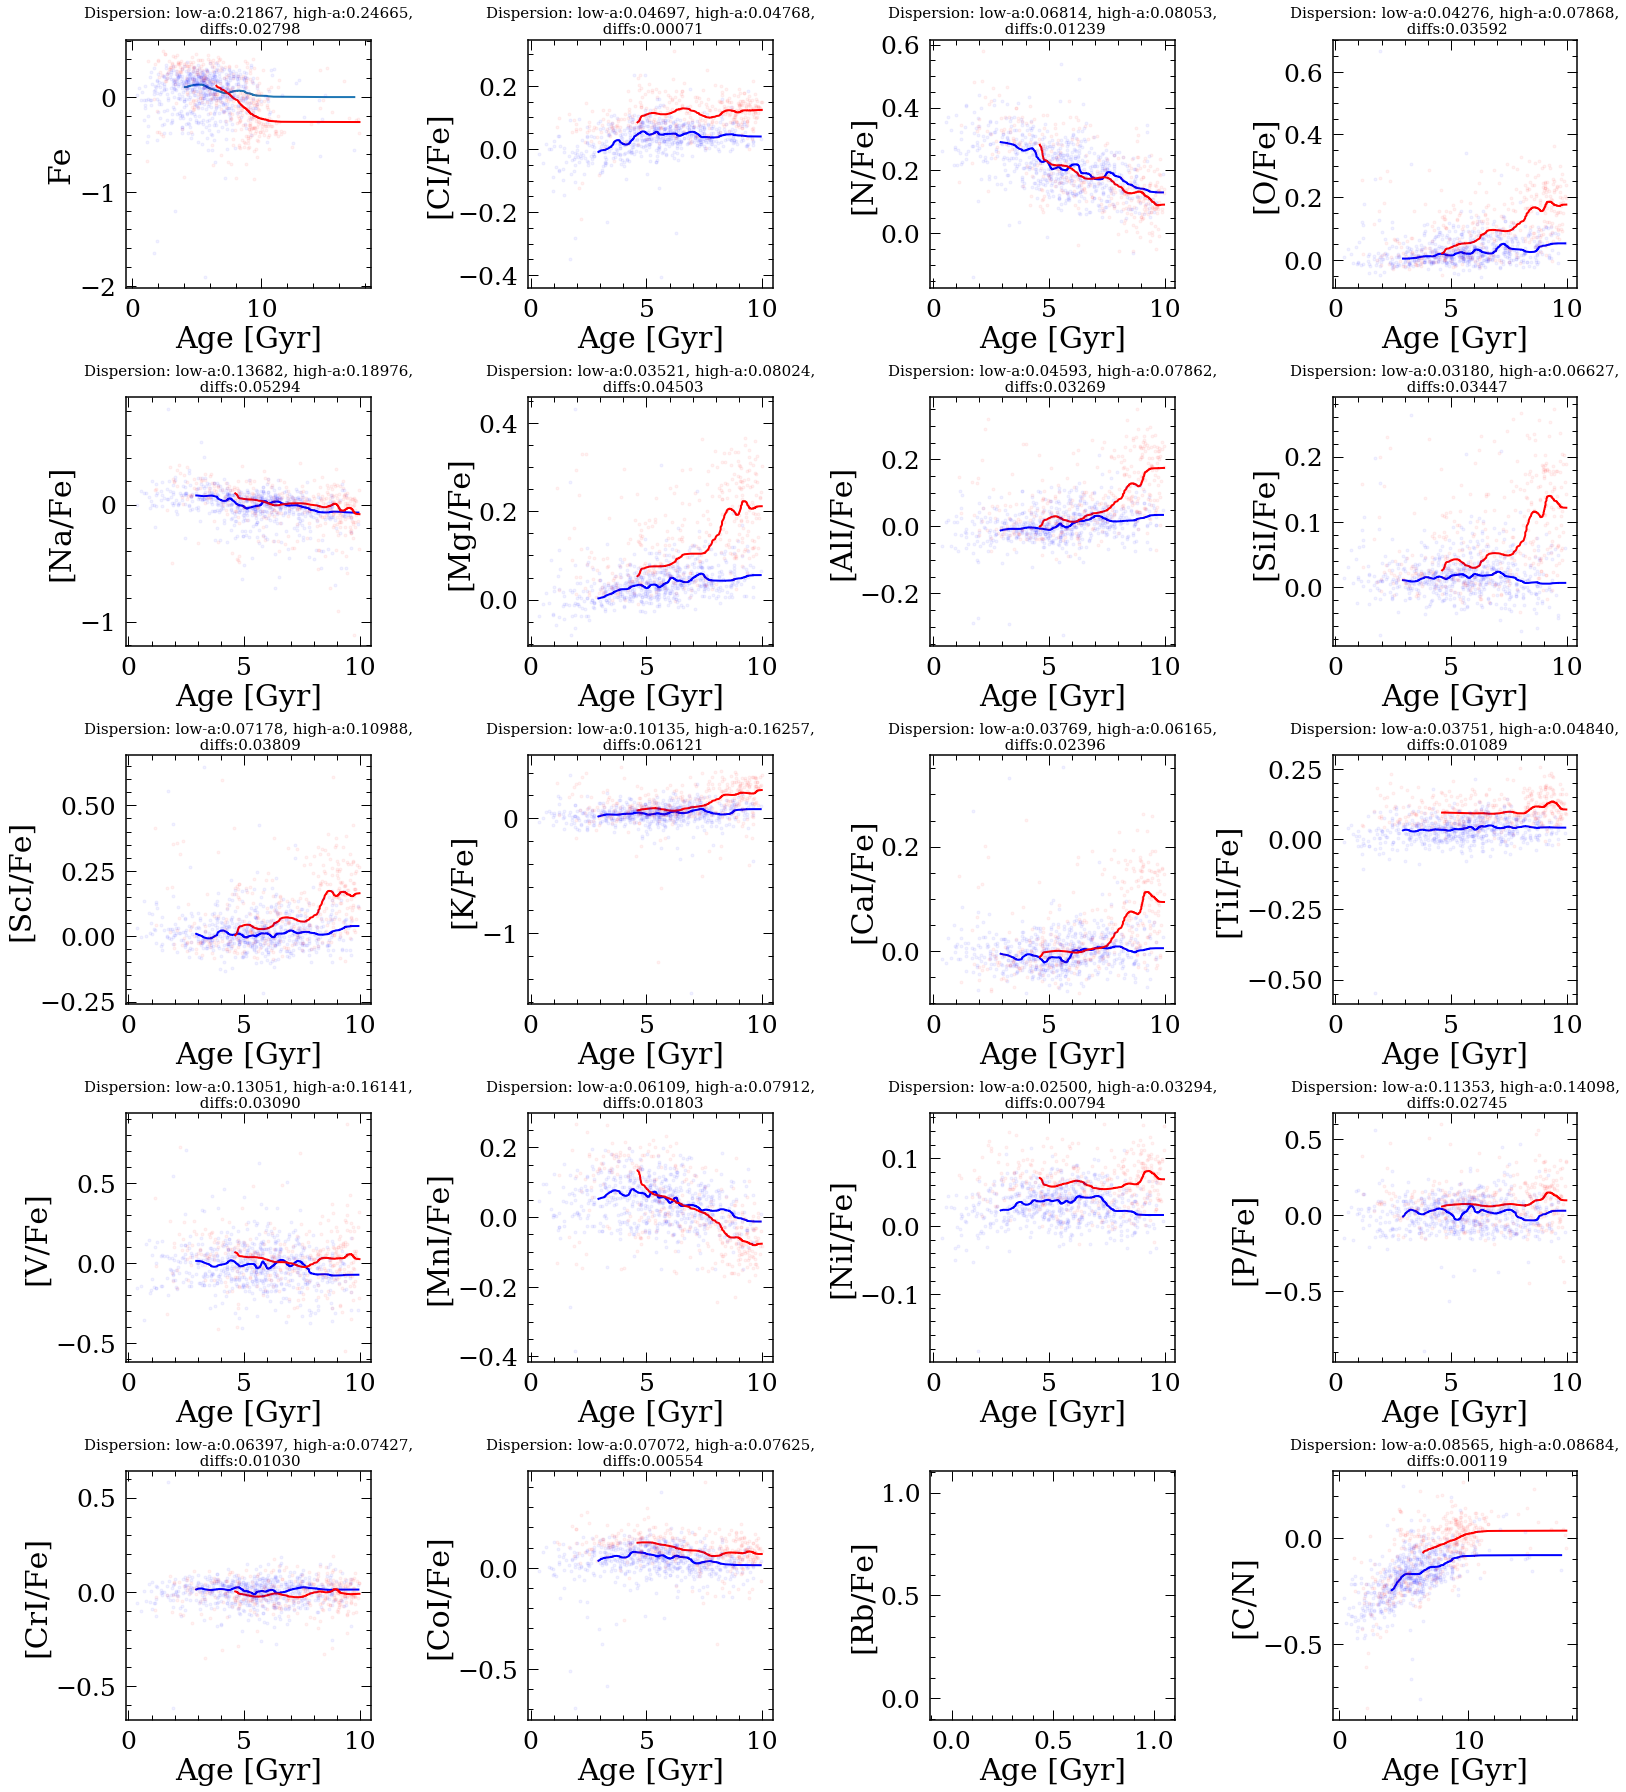

In [112]:
## running median
rn=30

Abunname=[]
hi_dis=[]
lo_dis=[]

tot_hi_dis=[]
tot_lo_dis=[]

from scipy.ndimage import gaussian_filter


plt.figure(figsize=(22.5,25))
for i in range(1,len(abun_apog)):
    df_plot_ha=df_abun_st_ha.loc[df_abun_st_ha[abun_apog[i]]>-100]
    df_plot_ha=df_plot_ha.loc[df_plot_ha['Age']<10]
    df_plot_ha=df_plot_ha.reset_index(drop=True)
    
    df_plot_la=df_abun_st_la.loc[df_abun_st_la[abun_apog[i]]>-100]
    df_plot_la=df_plot_la.loc[df_plot_la['Age']<10]
    df_plot_la=df_plot_la.reset_index(drop=True)
    
    
    df_plot_la=df_plot_la.sort_values(by=['Age'])
    df_plot_ha=df_plot_ha.sort_values(by=['Age'])
    
    df_plot_la['med']=gaussian_filter(df_plot_la[abun_apog[i]].rolling(rn).median(), sigma=10)
    df_plot_ha['med']=gaussian_filter(df_plot_ha[abun_apog[i]].rolling(rn).median(), sigma=10)
    
    df_plot_la_new=df_plot_la.dropna(subset=['Age','med']).reset_index(drop=True)
    df_plot_ha_new=df_plot_ha.dropna(subset=['Age','med']).reset_index(drop=True)
    
    plt.subplot(5,4,i+1)
    plt.errorbar(df_plot_la['Age'],df_plot_la[abun_apog[i]],fmt='b.',alpha=0.05,label='low-$\\alpha$')
    plt.errorbar(df_plot_ha['Age'],df_plot_ha[abun_apog[i]],fmt='r.',alpha=0.05,label='high-$\\alpha$')
    
    if len(df_plot_la['Age'])!=0:   
        print(abun_apog[i])
        
        plt.plot(df_plot_la['Age'],df_plot_la['med'],'b-',alpha=1,linewidth=2,label='low-$\\alpha$')
        plt.plot(df_plot_ha['Age'],df_plot_ha['med'],'r-',alpha=1,linewidth=2,label='high-$\\alpha$')
        
        
        tot_la,disp_la=calc_disp(df_plot_la,abun_apog[i])
        
        tot_ha,disp_ha=calc_disp(df_plot_ha,abun_apog[i])
        #print(abun_apog[i])
        plt.title('Dispersion: low-a:%.5f, high-a:%.5f,\n diffs:%.5f'%(disp_la,disp_ha,disp_ha-disp_la),fontsize=15)
    
    
        Abunname.append(abund[abun_apog[i]]+'Fe]')
        hi_dis.append(disp_ha)
        lo_dis.append(disp_la)
        tot_hi_dis.append(tot_ha)
        tot_lo_dis.append(tot_la)
        
    plt.ylabel(abund[abun_apog[i]]+'Fe]')
    plt.xlabel('Age [Gyr]')
    
    
    
    #plt.legend()
    
    
# For Fe
df_plot_ha=df_abun_st_ha.loc[df_abun_st_ha['M_H']>-100]
df_plot_ha=df_plot_ha.reset_index(drop=True)
    
df_plot_la=df_abun_st_la.loc[df_abun_st_la['M_H']>-100]
df_plot_la=df_plot_la.reset_index(drop=True)
    
df_plot_la=df_plot_la.sort_values(by=['Age'])
df_plot_ha=df_plot_ha.sort_values(by=['Age'])
    
df_plot_la['med']=gaussian_filter(df_plot_la['M_H'].rolling(rn).median(),sigma=30)
df_plot_ha['med']=gaussian_filter(df_plot_ha['M_H'].rolling(rn).median(),sigma=30)
    
plt.subplot(5,4,1)
plt.errorbar(df_plot_la['Age'],df_plot_la['M_H'],fmt='b.',alpha=0.05,label='low-$\\alpha$')
plt.errorbar(df_plot_ha['Age'],df_plot_ha['M_H'],fmt='r.',alpha=0.05,label='high-$\\alpha$')
    
plt.plot(df_plot_la['Age'],df_plot_la['med'],alpha=1,linewidth=2,label='low-$\\alpha$')
plt.plot(df_plot_ha['Age'],df_plot_ha['med'],'r-',alpha=1,linewidth=2,label='high-$\\alpha$')

tot_la,disp_la=calc_disp(df_plot_la,'M_H')
tot_ha,disp_ha=calc_disp(df_plot_ha,'M_H')
plt.title('Dispersion: low-a:%.5f, high-a:%.5f,\n diffs:%.5f'%(disp_la,disp_ha,disp_ha-disp_la),fontsize=15)

Abunname.append('Fe')
hi_dis.append(disp_ha)
lo_dis.append(disp_la)
tot_hi_dis.append(tot_ha)
tot_lo_dis.append(tot_la)

plt.ylabel('Fe')
plt.xlabel('Age [Gyr]')
#plt.legend()
 
# for C/N
df_plot_ha=df_abun_st_ha.loc[df_abun_st_ha['C_FE']>-100]
df_plot_ha=df_plot_ha.loc[df_plot_ha['N_FE']>-100]
df_plot_ha['C_N']=df_plot_ha['C_FE']-df_plot_ha['N_FE']
df_plot_ha['C_N_ERR']=np.sqrt(df_plot_ha['C_FE_ERR']**2.+df_plot_ha['N_FE_ERR']**2.)
df_plot_ha=df_plot_ha.reset_index(drop=True)
    
df_plot_la=df_abun_st_la.loc[df_abun_st_la['C_FE']>-100]
df_plot_la=df_plot_la.loc[df_plot_la['N_FE']>-100]
df_plot_la['C_N']=df_plot_la['C_FE']-df_plot_la['N_FE']
df_plot_la['C_N_ERR']=np.sqrt(df_plot_la['C_FE_ERR']**2.+df_plot_la['N_FE_ERR']**2.)
df_plot_la=df_plot_la.reset_index(drop=True)

df_plot_la=df_plot_la.sort_values(by=['Age'])
df_plot_ha=df_plot_ha.sort_values(by=['Age'])    
    
df_plot_la['med']=gaussian_filter(df_plot_la['C_N'].rolling(rn).median(),sigma=30)
df_plot_ha['med']=gaussian_filter(df_plot_ha['C_N'].rolling(rn).median(),sigma=30)
    
plt.subplot(5,4,20)
plt.errorbar(df_plot_la['Age'],df_plot_la['C_N'],fmt='b.',alpha=0.05,label='low-$\\alpha$')
plt.errorbar(df_plot_ha['Age'],df_plot_ha['C_N'],fmt='r.',alpha=0.05,label='high-$\\alpha$')
    
plt.plot(df_plot_la['Age'],df_plot_la['med'],'b-',alpha=1,linewidth=2,label='low-$\\alpha$')
plt.plot(df_plot_ha['Age'],df_plot_ha['med'],'r-',alpha=1,linewidth=2,label='high-$\\alpha$')

tot_la,disp_la=calc_disp(df_plot_la,'C_N')
tot_ha,disp_ha=calc_disp(df_plot_ha,'C_N')
  
Abunname.append('[C/N]')
hi_dis.append(disp_ha)
lo_dis.append(disp_la)
tot_hi_dis.append(tot_ha)
tot_lo_dis.append(tot_la)

plt.title('Dispersion: low-a:%.5f, high-a:%.5f,\n diffs:%.5f'%(disp_la,disp_ha,disp_ha-disp_la),fontsize=15)

plt.ylabel('[C/N]')
plt.xlabel('Age [Gyr]')
#plt.legend()

plt.tight_layout()

In [113]:
Abunname=[i.split('/')[0].split('[')[-1] for i in Abunname]
lo_dis,Abunname,hi_dis,tot_lo_dis,tot_hi_dis=zip(*sorted(zip(lo_dis,Abunname,hi_dis,tot_lo_dis,tot_hi_dis)))

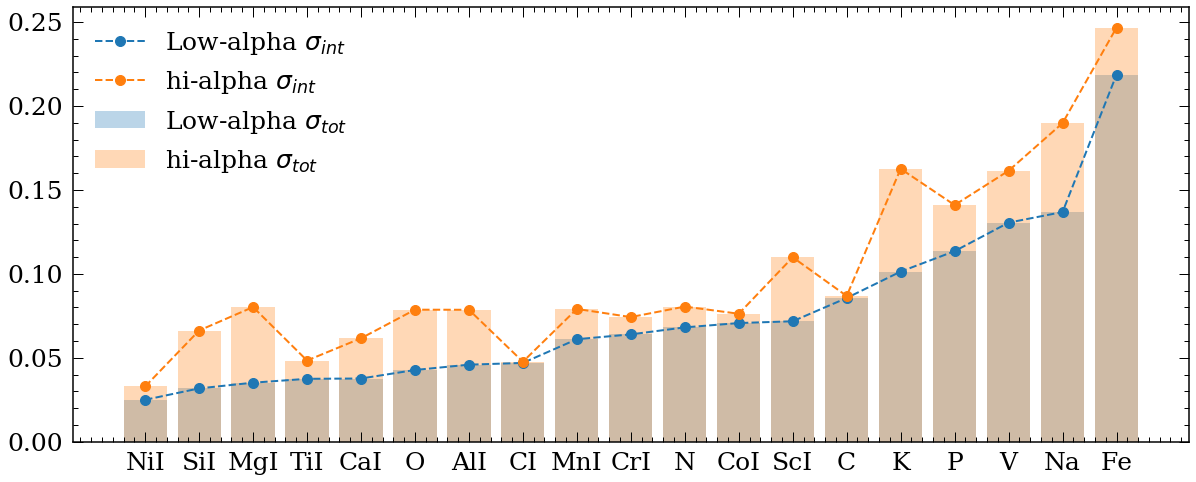

In [114]:
plt.figure(figsize=(20,8))
plt.plot(Abunname,lo_dis,'--o',label='Low-alpha $\sigma_{int}$',markersize=10)
plt.plot(Abunname,hi_dis,'--o',label='hi-alpha $\sigma_{int}$',markersize=10)
plt.bar(Abunname,tot_lo_dis,label='Low-alpha $\sigma_{tot}$',alpha=0.3)
plt.bar(Abunname,tot_hi_dis,label='hi-alpha $\sigma_{tot}$',alpha=0.3)
plt.legend()